# CSE 676 Deep Learning Project

Name: Akanksha Das <br>
ubid: adas9

Name: Sharath Subramanya Ravishankar <br>
ubid:  sharaths

Link to File on Drive: https://drive.google.com/file/d/1xaFfdYHI0BG4vcxjTWK-wG8pLrH83Wc5/view?usp=sharing

# Problem we are trying to solve

# Image Classification using CIFAR-10 dataset

We will create an image classification model using convolutional neural networks capable of classifying the images in 10 different classes. We will also discuss the accuracy and loss curves of the trained model on the test set.
The aim of the project is to study the behaviour of various neural networks and the effect of various features on the models built for the CIFAR 10 dataset.

# Convolutional Network

## Overview of Convolutional Network

- Convolutional networks (LeCun, 1989), also known as convolutional neural
networks or CNNs, are a specialized kind of neural network. 
- They are primarily used for processing data
that has a known, grid-like topology.
  - time-series data, which can
be thought of as a 1D grid taking samples at regular time intervals
 - Image data,
which can be thought of as a 2D grid of pixels

- They utilize convolution, which is a specialized kind of linear operation

###  CNN is a Neural Network with a convolutional layer
 - CNNs are simply neural networks that use convolution in place of general matrix multiplication in at least one of their layers
 - Convolution can be viewed as multiplication by a matrix 

###  Fully connected layers to convolution 
- Why CNN? 
  - MLP may work best for tabular data
  - For high-dimenstional perceptual data, MLP may not be so Ideal
- Distinguish Cats from Dogs
  - Too much parameters for MLP to learn to be feasible
  - CNNs are creative way that machine learning has embraced for exploiting some of the known structure in natural images. 

### Constraint of MLP
- consider an MLP with two-dimensional images $\mathbf{X}$ as inputs and their immediate hidden representations $\mathbf{H}$ similarly represented as matrices (they are two-dimensional tensors in code), where both $\mathbf{X}$ and $\mathbf{H}$ have the same shape.
- Let $[\mathbf{X}]_{i, j}$ and $[\mathbf{H}]_{i, j}$ denote the pixel at location $(i, j)$ in the input image and hidden representation, respectively. We formally express the fully connected layer as
   $$\begin{split}\begin{aligned} \left[\mathbf{H}\right]_{i, j} &= [\mathbf{U}]_{i, j} + \sum_k \sum_l[\mathsf{W}]_{i, j, k, l}  [\mathbf{X}]_{k, l}\\ &=  [\mathbf{U}]_{i, j} +
\sum_a \sum_b [\mathsf{V}]_{i, j, a, b}  [\mathbf{X}]_{i+a, j+b}.\end{aligned}\end{split}$$
    - $\mathbf{U}$ contains biases
    - The switch from $\mathsf{W}$ to $\mathsf{V}$ is entirely cosmetic for now since there is a one-to-one correspondence between coefficients in both fourth-order tensors.
    - We simply re-index the subscripts $(k, l)$ such that $k = i+a$ and $l = j+b$. In other words, we set $[\mathsf{V}]_{i, j, a, b} = [\mathsf{W}]_{i, j, i+a, j+b}$.
    - The indices $a$ and $b$ run over both posituve and negative offsets, covering the entire image. 
    -For any given location ($i$, $j$) in the hidden representation $[\mathbf{H}]_{i, j}$, we compute its value by summing over pixels in $x$, centered around $(i, j)$ and weighted by $[\mathsf{V}]_{i, j, a, b}$.
    - Before we carry on, let's consider the total number of parameters required for a *single* layer in this parametrization: a $1000 \times 1000$ image (1 megapixel) is mapped to a $1000 \times 1000$ hidden representation. This requires $10^{12}$ parameters, far beyond what computers currently can handle.  

###  Invariance
- We want to detect an object in an image
  - Should not be overly concerned with the percise location of the object in the image, the system should exploit this knowldege intuitively like "*Pig usually don't fly and planes usually do not swim*"

### Intuitions of the Design Scheme 
1. In the earliest layers, our network should respond similarly to the same patch, regardless of where it appears in the image. This principle is called **translation invariance** (or translation equivariance).
2. The earliest layers of the network should focus on local regions, without regard for the contents of the image in distant regions. This is the locality principle. Eventually, these **local representations** can be aggregated to make predictions at the whole image level.
3. As we proceed, deeper layers should be able to capture longer-range features of the image, in a way similar to higher level vision in nature.

### Translation Invariance
- Remeber the first principle when designing the CNN? Let's consolidate it with mathematics
- Simply put a shift in input $\mathbf{X}$ should lead to a shift in the hidden representation $\mathbf{H}$
    - This is only possible if $\mathsf{V}$ and $\mathbf{U}$ do not actually depend on $(i, j)$.
    - Therefore we have a simplfied definition of the hidden representation $\mathbf{H}$: 
    $$[\mathbf{H}]_{i, j} = u + \sum_a\sum_b [\mathbf{V}]_{a, b}  [\mathbf{X}]_{i+a, j+b}.$$
        - $[\mathsf{V}]_{i, j, a, b} = [\mathbf{V}]_{a, b}$ and $\mathbf{U}$ is a constant
    - We are effectively weighting pixels at $(i+a, j+b)$ in the vicinity of location $(i, j)$ with coefficients $[\mathbf{V}]_{a, b}$ to obtain the value $[\mathbf{H}]_{i, j}$.
    - **Note** that $[\mathbf{V}]_{a, b}$ needs many fewer coefficients than $[\mathsf{V}]_{i, j, a, b}$ since it no longer depends on the location within the image. 
    - Consequently, the number of parameters required is no longer $10^{12}$ but a much more reasonable $4 \cdot 10^6$: we still have the dependency on $a, b \in (-1000, 1000)$.

### Locality
- As motivated the design principle, we believe that we should not have to look very far away from location $(i, j)$ in order to glean relevant information to assess what is going on at $[\mathbf{H}]_{i, j}$.
- This means that outside some range $|a|> \Delta$ or $|b| > \Delta$, we should set $[\mathbf{V}]_{a, b} = 0$.
$$[\mathbf{H}]_{i, j} = u + \sum_{a = -\Delta}^{\Delta} \sum_{b = -\Delta}^{\Delta} [\mathbf{V}]_{a, b}  [\mathbf{X}]_{i+a, j+b}.$$
    - This reduces the number of parameters from $4 \cdot 10^6$ to $4 \Delta^2$, where $\Delta$ is typically smaller than $10$.

## What is Convolution?

- Convolution is an operation on two functions of a real-valued arugment
- Examples of the two functions in One dimension
    - Tracking location of a spaceship by a laser sensor
        - A laser sensor provides a single output $x(t)$, the position of spaceship at time $t$
        - If laser sensor is noisy, we want a weighted average that gives more weight to recent observations
        - Weighting function is $w(a)$ where $a$ is age of measurement
- Convolution is the weighted average or smoothed estimate of the position of the spaceship
    - $s(t)=\int x(a) w(t-a) d a$

### Convolution with Discrete Variables

- Laser sensor may only data at regurlar intervals
- Time index $t$ can take on only integer values
    - $x$ and $w$ defined only on integer $t$
        
        $$
        s(t)=\left(x^{*} w\right)(t)=\sum_{a=-\infty}^{\infty} x(a) w(t-a)
        $$
        
- In Machine Learning applications, input is a multidimensional array of data and the kernel is a multidimensional array of parameters that are adapted by the learning algorithm
    - These arrays are referred to as tensors
- Input and kernel are explicitly stored separately
    - The functions are zero everywhere expect these points

### Two-dimensional convolution

- Convolutions over more than one axis
- If we use a 2D image $I$  as input and use a 2D kernel $K$ we have
    
    $$
    S(i, j)=\left(I^{*} K\right)(i, j)=\sum_{m} \sum_{n} I(m, n) K(i-m, j-n)
    $$
    
- Convolution is communicative, we can equivalently write:

$$
S(i, j)=(K * I)(i, j)=\sum_{m} \sum_{n} I(i-m, j-n) K(m, n) .
$$

- Communicativity arises because we have flipped the kernel relative to the input
    - As $m$  increases, index to the input increases, but the index to the kernel decreases

### Example of 2D convolution

- Convolution without kernel flipping applied to a 2D tensor
- Ouput is restricted to case where kernel is situated entirely within the image
- Arrows shows how upper-left of input tensor is used to form upper-left of output tensor
    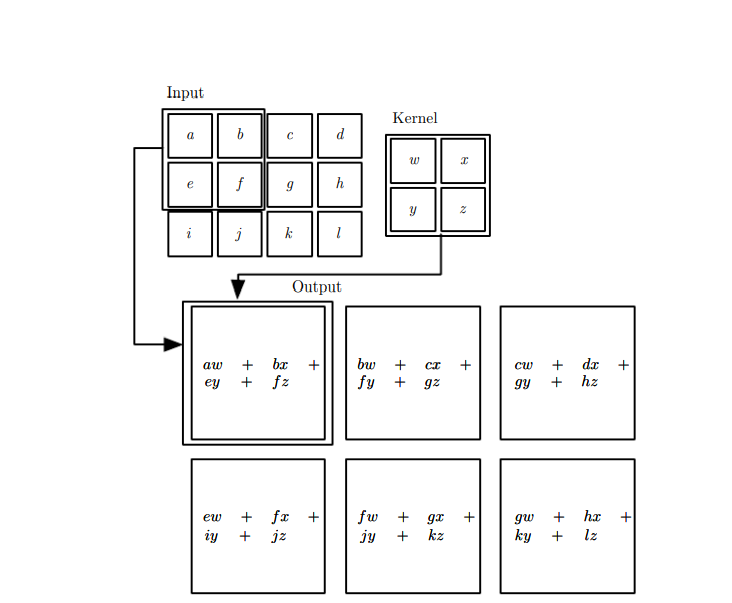

### Cross- Correlation

- Same as convolution, but without flipping the kernel
    
    $$
    S(i, j)=(I * K)(i, j)=\sum_{m} \sum_{n} I(i+m, j+n) K(m, n) .
    $$
    
- Both referred to as convolution, and whether kernel is flipped or not
- In Machine learning, learning algorithm will learn appropriate values of the kernel in the appropriate place
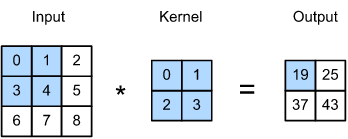


$$0\times0+1\times1+3\times2+4\times3=19$$

### Cross Correlation and Convolution 
- In order to obtain the output of the strict convolution operation, we only need to flip the two-dimensional kernel tensor both horizontally and vertically, and then perform the cross-correlation operation with the input tensor.
- It is **noteworthy** that since kernels are learned from data in deep learning, the outputs of convolutional layers remain unaffected no matter such layers perform either the strict convolution operations or the cross-correlation operations.



### Illustration of Cross Correlation and Convolution 
- Suppose that a convolution layer performs *cross-correlation* and learns the kernel
<img src="https://d2l.ai/_images/correlation.svg">
- Let denote the learned kernel as matrix $\mathbf{K}$. Assuming that other conditions remain unchanged, when this layer performs strict convolution instead, the learned kernel $\mathbf{K}'$ will be the same as $\mathbf{K}$ after $\mathbf{K}'$ is flipped both horizontally and vertically.
- That is to say,when the convolutional layer performs strict *convolution* for the input in the above figure and $\mathbf{K}'$, the same output in the above figure (cross-correlation of the input and $\mathbf{K}$) will be obtained.

### Discrete Convolution Viewed as Matrix multiplication
- Convolution can be viewed as multiplication by a matrix
- However the matrix has several entries constrained to be zero
- Or constrained to be equal to other elements
    - For univariate discrete convolution: Univariate Toeplitz matrix:
        - Rows are shifted versions of previous row
        $$
        A=\left[\begin{array}{cccccc}
        a_{0} & a_{-1} & a_{-2} & \cdots & \cdots & a_{-(n-1)} \\
        a_{1} & a_{0} & a_{-1} & \ddots & & \vdots \\
        a_{2} & a_{1} & \ddots & \ddots & \ddots & \vdots \\
        \vdots & \ddots & \ddots & \ddots & a_{-1} & a_{-2} \\
        \vdots & & \ddots & a_{1} & a_{0} & a_{-1} \\
        a_{n-1} & \cdots & \cdots & a_{2} & a_{1} & a_{0}
        \end{array}\right]
        $$
    - 2D case: doubly block circulant matrix
        - It corresponds to convolution
        $$
        C=\left[\begin{array}{ccccc}
        c_{0} & c_{n-1} & \ldots & c_{2} & c_{1} \\
        c_{1} & c_{0} & c_{n-1} & & c_{2} \\
        \vdots & c_{1} & c_{0} & \ddots & \vdots \\
        c_{n-2} & & \ddots & \ddots & c_{n-1} \\
        c_{n-1} & c_{n-2} & \ldots & c_{1} & c_{0}
        \end{array}\right]
        $$

## Motivation for using convolution networks
-  Convolution leverages three important ideas to improve $\mathrm{ML}$ systems:
   - Sparse interactions
   - Parameter sharing
   - Equivariant representations
- Convolution also allows for working with inputs of variable size

### Sparse Interaction 
- Tradition Neural Network Layer
    - Use Matrix multiplication by a matrix of parameters with a seperate parameter
        - Describing the interaction between each input unit and each output unit
        - This means every output unit interacts with every input unit
- Convolutional networks, however, typically have **sparse interactions** (**sparse connectivity** or **sparse weights**)
    - Making the kernel smaller than the input
    - Example: When processing an image, the input image might have thousands or millions of pixels, but we can detect small, meaningful features such as edges with kernels that occupy only tens or hundreds of pixels.
        - store fewer parameters,reduces the memory requirements of the model and improves its statistical efficiency.
        - computing the output requires fewer operations.

- If there are $m$ inputs and $n$ outputs, then matrix multiplication requires $m\times n$ parameters and algorithms used in practice have $O(m\times n)$ runtime(per example).
    - If we limit the number of connections each output may have to $k$, then the sparsely connected approach requires only $k\times n$ parameters and $O(k \times n )$ runtime. 

###  Sparse Connectivity, Viewed From below 
- Highlight one input $x_{3}$ and output units s affected by it
- Top: when $s$ is formed by convolution with a kernel of width 3 , only three outputs are affected by $x_{3}$
- Bottom: when $s$ is formed by matrix multiplication connectivity is no longer sparse
- So all outputs are affected by $x_{3}$
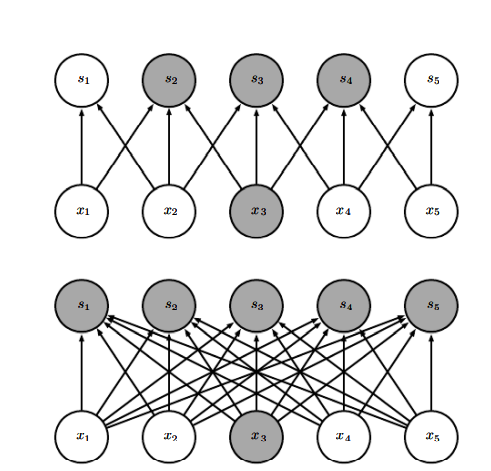

###  Sparse Connectivity, viewed from above
- Highlight one output $s_{3}$ and inputs $x$ that affect this unit 
    - These units are known as the receptive field of $s_{3}$
- When $s_{3}$ is formed by convolution with a kernel of width 3
- When $s_{3}$ is formed by matrix multiplication

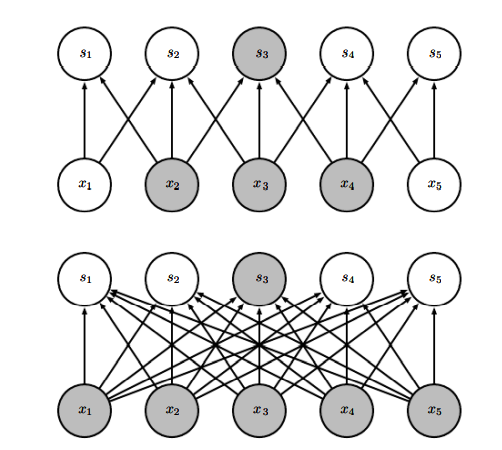

### Keeping up performance with reduced connections
- It is possible to obtain good performance while keeping $k$ several magnitudes lower than $m$
- In a deep neural network, units in deeper layers may indirectly interact with a larger portion of the input
    - Receptive Field in Deeper layers is larger than the receptive field of units in shallow layers
    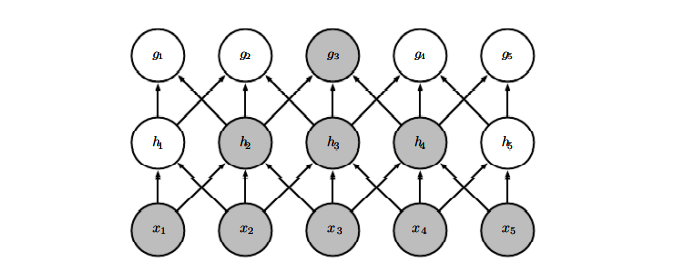

- This allows the network to efficiently describe complicated interactions between many variables from simple building blocks that only describe sparse interactions

###  Definition of input and kernel

- Convolution is a new function $s$, the weighted average of $x$:
    
    $$
    s(t)=\int x(a) w(t-a) d a
    $$
    
    - This operation is typically denoted with an asterisk
        
        $$
        s(t)=(x * w)(t)
        $$
        
        - $w$ needs to be a valid pdf or the output is not a weighted average
        - $w$ needs to be 0 for negative arguments, or it will look into the future, which is beyond our capacities.

### Padding and Stride
- As motivation, note that since kernels generally have width and height greater than $1$, after applying many successive convolutions, we tend to wind up with outputs that are considerably smaller than our input
    - If we start with a $240 \times 240$ pixel image, $10$ layers of $5 \times 5$ convolutions reduce the image to $200 \times 200$ pixels, slicing off $30 \%$ of the image and with it obliterating any interesting information on the boundaries of the original image.
        - *Padding* is the most popular tool for handling this issue.
- In other cases, we may want to reduce the dimensionality drastically,
    - e.g., if we find the original input resolution to be unwieldy.
        - *Strided convolutions* are a popular technique that can help in these instances.

### Padding 
- One straightforward solution to this problem is to add extra pixels of filler around the boundary of our input image, thus increasing the effective size of the image.
    - Typically, we set the values of the extra pixels to zero.
    ![image info](https://d2l.ai/_images/conv-pad.svg)
    - We pad a $3\times 3$ input, increasing its size to $5\times5$. The corresponding output then increases to a $4\times4$ matrix. 
    - Calculation of shaded portion: 
    $$0\times0+0\times1+0\times2+0\times3=0$$

### Implementation and Mathematics of Padding 
- if we add a total of $p_h$ rows of padding (roughly half on top and half on bottom) and a total of $p_w$ columns of padding (roughly half on the left and half on the right), the output shape will be

    $$(n_h-k_h+p_h+1)\times(n_w-k_w+p_w+1).$$
    - This means that the height and width of the output will increase by $p_h$ and $p_w$, respectively.

- Common choice for padding: 
    - In many cases, we will want to set $p_h=k_h-1$ and $p_w=k_w-1$ to give the input and output the same height and width.

- If $k_h$ is odd here, we will pad $p_h/2$ rows on both sides of the height.

- If $k_h$ is even, one possibility is to pad $\lceil p_h/2\rceil$ rows on the top of the input and $\lfloor p_h/2\rfloor$ rows on the bottom. We will pad both sides of the width in the same way.

### Stride
- When computing the cross-correlation, we start with the convolution window at the upper-left corner of the input tensor, and then slide it over all locations both down and to the right.
- In the previous examples, we defaulted to sliding one element at a time.
    - However, sometimes, either for computational efficiency or because we wish to downsample, we move our window more than one element at a time, skipping the intermediate locations. 
        - This is particularly useful if the convolution kernel is large since it captures a large area of the underlying image.

### Implementation and Mathematics For Stride
- Cross-correlation with strides of 3 and 2 for height and width, respectively.
![StrideImage](https://d2l.ai/_images/conv-stride.svg)

- Calculation for the shaded region: 

$0\times0+0\times1+1\times2+2\times3=8$, $0\times0+6\times1+0\times2+0\times3=6$.

- In general, when the stride for the height is $s_{h}$ and the stride for the width is $s_{w}$, the output shape is
$$ \left\lfloor\left(n_{h}-k_{h}+p_{h}+s_{h}\right) / s_{h}\right\rfloor \times\left\lfloor\left(n_{w}-k_{w}+p_{w}+s_{w}\right) / s_{w}\right\rfloor $$

- If we set $p_{h}=k_{h}-1$ and $p_{w}=k_{w}-1$, then the output shape can be simplified to $\left\lfloor\left(n_{h}+s_{h}-1\right) / s_{h}\right\rfloor \times\left\lfloor\left(n_{w}+s_{w}-1\right) / s_{w}\right\rfloor$. 

- Going a step further, if the input height and width are divisible by the strides on the height and width, then the output shape will be $\left(n_{h} / s_{h}\right) \times\left(n_{w} / s_{w}\right)$.

## Pooling 
- Typical layer of a CNN consists of three stages
- Stage 1:
    - perform several convolutions in parallel to produce a set of linear? activations
- Stage 2 (Detector):
    - each linear activation is run through a nonlinear activation function such as ReLU
- Stage 3 (Pooling):
    - Use a pooling function to modify output of the layer further
    
    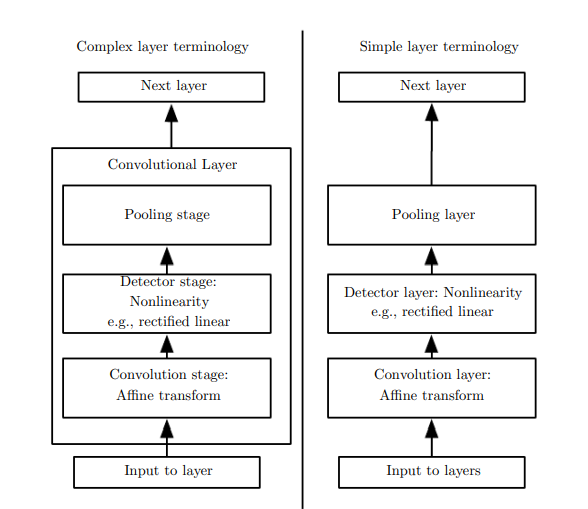

### Types of Pooling functions
- A pooling function replaces the output of the net at a certain location with a summary statistic of the nearby inputs
- Popular pooling functions:
    1. max pooling operation reports the maximum output within a rectangular neighborhood
    2. Average of a rectangular neighborhood
    3. $L^{2}$ norm of a rectangular neighborhood
    4. Weighted average based on the distance from the central pixel

### Pooling causes translation invariance
- In all cases, pooling helps make the representation become approximately invariant to small translations of the input
    - If we translate the input by a small amount values of most of the outputs does not change
    - Pooling can be viewed as adding a strong prior that the function the layer learns must be invariant to small translations

### Max Pooling introduces invariance to translation
- View of middle of output of a convolutional layer

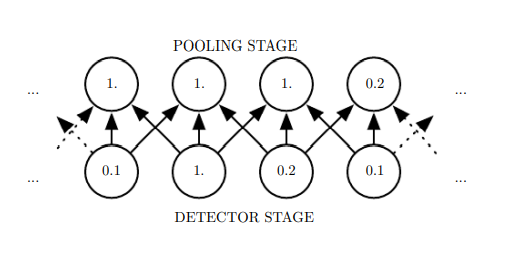

- Same network after the input has been shifted by one pixel

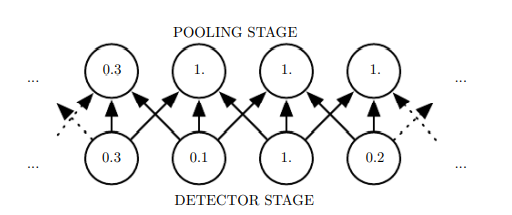

- Every input value has changed, but only half the values of output have changed because maxpooling units are only sensitive to maximum value in neighborhood not exact value

# Analysis of our dataset

The dataset is commonly used in Deep Learning for testing models of Image Classification. It has 60,000 colour images comprising 10 different classes. The image size is 32x32 and the dataset has 50,000 training images and 10,000 test images.

Since the images in CIFAR-10 are low-resolution (32x32), this dataset allows researchers to quickly try different algorithms to see what works. The images in the dataset are not clear and hard to identify even by human beings.


The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [4]:
import math
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split


In [5]:
import keras 
from keras import datasets
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Dropout,BatchNormalization
from keras.layers import Dense, Activation, Flatten
from keras.utils import np_utils
from keras import backend as K 
from keras.optimizers import gradient_descent_v2
from keras.utils.vis_utils import plot_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [6]:
(X_train, Y_train), (Xt, Yt) = cifar10.load_data()

In [7]:
X_test, X_val, Y_test, Y_val = train_test_split(Xt, Yt, test_size=0.2, random_state=42)

Shape of X train =  (50000, 32, 32, 3)
Shape of Y train =  (50000, 1)
Shape of X test =  (8000, 32, 32, 3)
Shape of Y test =  (8000, 1)
Shape of X val =  (2000, 32, 32, 3)
Shape of Y val =  (2000, 1)


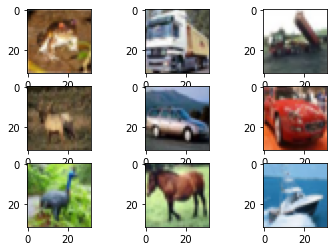

In [8]:
print('Shape of X train = ', X_train.shape)
print('Shape of Y train = ', Y_train.shape)
print('Shape of X test = ', X_test.shape)
print('Shape of Y test = ', Y_test.shape)
print('Shape of X val = ', X_val.shape)
print('Shape of Y val = ', Y_val.shape)

for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train[i])
plt.show()

In [9]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
X_train.dtype

dtype('uint8')

In [11]:
Y_train.dtype

dtype('uint8')

In [12]:
# Converting target to categorical 
Y_train = np_utils.to_categorical(Y_train,10)
Y_test = np_utils.to_categorical(Y_test,10)
Y_val = np_utils.to_categorical(Y_val,10)

In [13]:
norm_train = X_train.astype('float32')
norm_test = X_test.astype('float32')
norm_val = X_val.astype('float32')

# normalize to range 0-1
norm_train = norm_train/255.0
norm_test = norm_test/255.0
norm_val = norm_val/255.0

In [14]:
norm_test

array([[[[0.07450981, 0.12156863, 0.07450981],
         [0.09019608, 0.12941177, 0.07450981],
         [0.10980392, 0.13725491, 0.07843138],
         ...,
         [0.04313726, 0.01568628, 0.02352941],
         [0.02352941, 0.00392157, 0.01176471],
         [0.01960784, 0.00392157, 0.00392157]],

        [[0.07843138, 0.12941177, 0.08627451],
         [0.10196079, 0.14117648, 0.09411765],
         [0.13333334, 0.16078432, 0.10588235],
         ...,
         [0.03921569, 0.00392157, 0.01568628],
         [0.02745098, 0.        , 0.00392157],
         [0.02352941, 0.00784314, 0.00392157]],

        [[0.08235294, 0.12941177, 0.09019608],
         [0.11372549, 0.14901961, 0.10980392],
         [0.15294118, 0.18039216, 0.13333334],
         ...,
         [0.04705882, 0.01176471, 0.01568628],
         [0.04705882, 0.01568628, 0.01568628],
         [0.05882353, 0.04705882, 0.03921569]],

        ...,

        [[0.70980394, 0.73333335, 0.67058825],
         [0.6901961 , 0.70980394, 0.6509804 ]

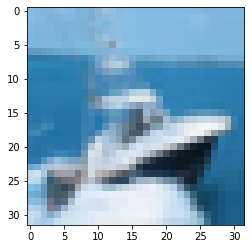

In [15]:
image=X_train[8,:].reshape((32,32,3))
plt.imshow(image)
plt.show()

In [16]:
x = norm_train[5]
print(x)
input = x.reshape((1,) + x.shape)
print(input)

[[[0.62352943 0.4        0.39607844]
  [0.5882353  0.35686275 0.37254903]
  [0.6        0.37254903 0.38039216]
  ...
  [0.35686275 0.2784314  0.21960784]
  [0.2901961  0.24705882 0.21568628]
  [0.29803923 0.22745098 0.21568628]]

 [[0.5568628  0.29411766 0.26666668]
  [0.57254905 0.28235295 0.25882354]
  [0.60784316 0.29803923 0.25490198]
  ...
  [0.49803922 0.4117647  0.2784314 ]
  [0.47843137 0.43529412 0.3647059 ]
  [0.3372549  0.27058825 0.23921569]]

 [[0.42745098 0.2627451  0.29411766]
  [0.3882353  0.22745098 0.23529412]
  [0.4117647  0.23137255 0.20392157]
  ...
  [0.5372549  0.4392157  0.3137255 ]
  [0.6392157  0.5176471  0.4117647 ]
  [0.3647059  0.28235295 0.2784314 ]]

 ...

 [[0.95686275 0.5058824  0.27450982]
  [0.9411765  0.48235294 0.25490198]
  [0.94509804 0.47843137 0.25490198]
  ...
  [0.6117647  0.16470589 0.05882353]
  [0.7019608  0.23137255 0.10196079]
  [0.78431374 0.28627452 0.14117648]]

 [[0.9647059  0.52156866 0.2901961 ]
  [0.9529412  0.5019608  0.28235295]


In [17]:
# no_of_pixel_rows=32
# no_of_pixel_columns=32
# net_shape=(no_of_pixel_rows,no_of_pixel_columns)
# X_train=X_train.reshape(X_train.shape[0], *net_shape,3)
# X_test=X_test.reshape(X_test.shape[0], *net_shape,3)

# print(f"Shape of Training X after reshaping {X_train.shape}")
# print(f"Shape of Test X after reshaping {X_test.shape}")

# Sequential Convolutional 2D Model

In [18]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='valid', input_shape=(32,32,3)))
model.add(BatchNormalization())

model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='valid'))
model.add(BatchNormalization())

model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='valid'))
model.add(BatchNormalization())

#model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='valid'))
model.add(BatchNormalization())

# model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='valid'))
# model.add(BatchNormalization())

model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

# model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='valid'))
# model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

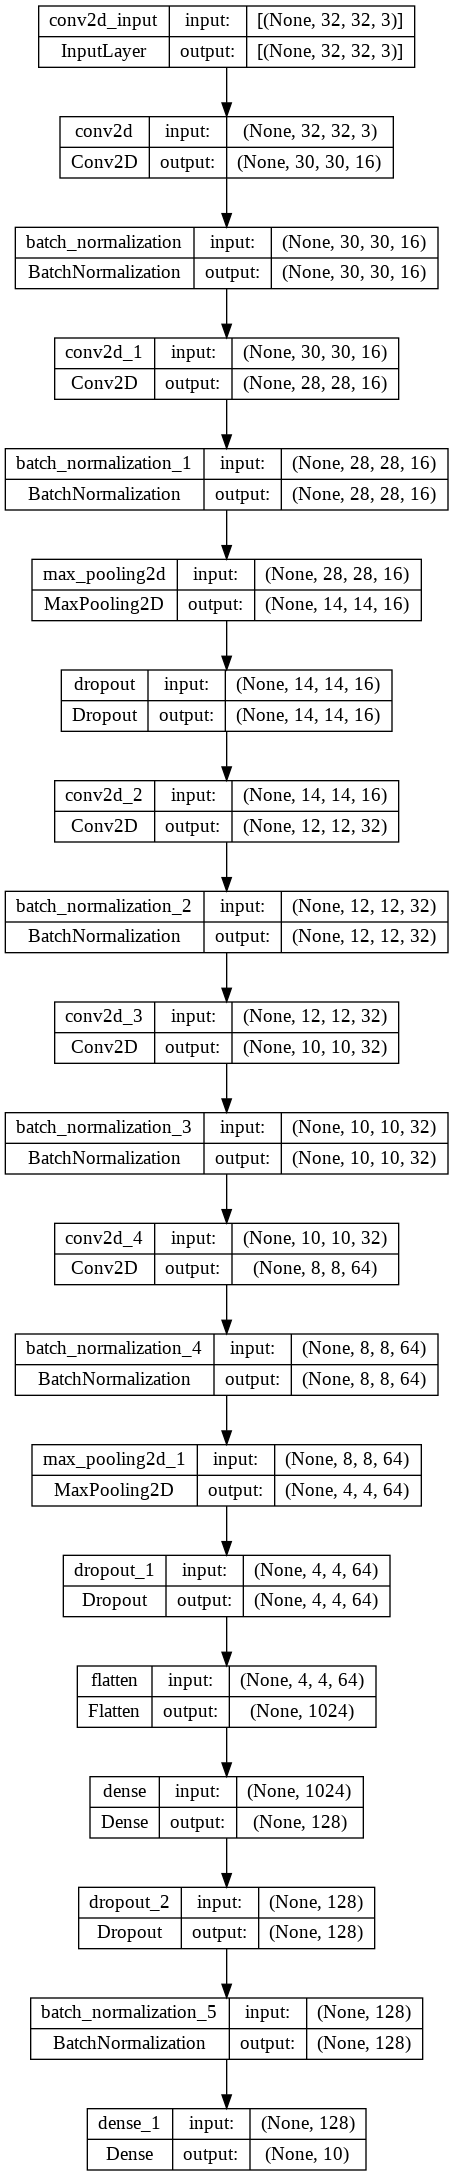

In [19]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [20]:
opt = gradient_descent_v2.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
# Fitting the model 

history = model.fit(norm_train, Y_train, epochs=50, batch_size=64, validation_data=(norm_val, Y_val), verbose=2)

Epoch 1/50
782/782 - 14s - loss: 1.5634 - accuracy: 0.4391 - val_loss: 1.2991 - val_accuracy: 0.5225 - 14s/epoch - 17ms/step
Epoch 2/50
782/782 - 6s - loss: 1.1984 - accuracy: 0.5678 - val_loss: 1.0686 - val_accuracy: 0.6280 - 6s/epoch - 7ms/step
Epoch 3/50
782/782 - 8s - loss: 1.0655 - accuracy: 0.6217 - val_loss: 1.0126 - val_accuracy: 0.6400 - 8s/epoch - 10ms/step
Epoch 4/50
782/782 - 6s - loss: 0.9836 - accuracy: 0.6521 - val_loss: 0.9455 - val_accuracy: 0.6730 - 6s/epoch - 8ms/step
Epoch 5/50
782/782 - 4s - loss: 0.9206 - accuracy: 0.6748 - val_loss: 0.8454 - val_accuracy: 0.7190 - 4s/epoch - 6ms/step
Epoch 6/50
782/782 - 4s - loss: 0.8754 - accuracy: 0.6910 - val_loss: 0.9748 - val_accuracy: 0.6635 - 4s/epoch - 6ms/step
Epoch 7/50
782/782 - 4s - loss: 0.8298 - accuracy: 0.7057 - val_loss: 0.8315 - val_accuracy: 0.7105 - 4s/epoch - 6ms/step
Epoch 8/50
782/782 - 4s - loss: 0.8025 - accuracy: 0.7171 - val_loss: 0.7573 - val_accuracy: 0.7355 - 4s/epoch - 6ms/step
Epoch 9/50
782/782 -

In [22]:
trainingAccuracy = model.evaluate(norm_train,Y_train,verbose=0)
testingAccuracy = model.evaluate(norm_val,Y_val,verbose=0)
print('\n\n')
print('\nTraining Accuracy: ',trainingAccuracy[1])
print('\nTest Accuracy: ',testingAccuracy[1])





Training Accuracy:  0.9317200183868408

Test Accuracy:  0.7900000214576721


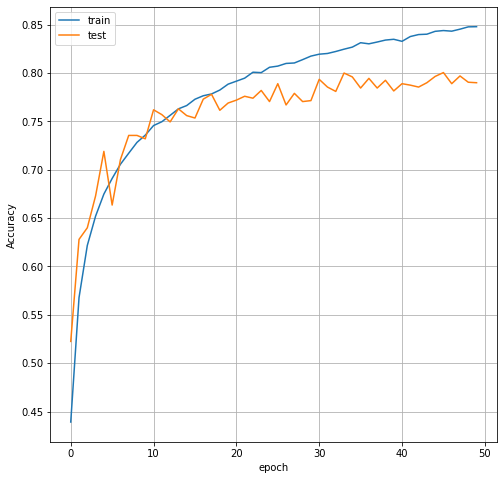

In [23]:
plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

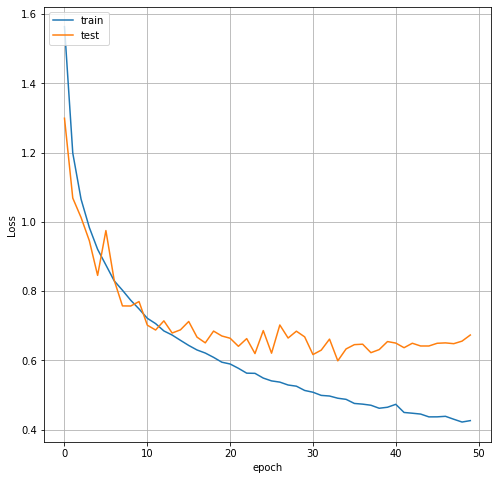

In [41]:
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'], label='Training Accuracy')
plt.plot(history.history['val_loss'], label='Test Accuracy')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

In [25]:
y_pred = model.predict(norm_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred.shape

250/250 [==============================] - 1s 3ms/step


(8000,)

In [26]:
y_pred[1].shape

()

In [27]:
Y_test_1 = np.argmax(Y_test,axis=1)

In [28]:
Y_test_1[1]

5

In [29]:
class_names[int(Y_test_1[1])]

'dog'

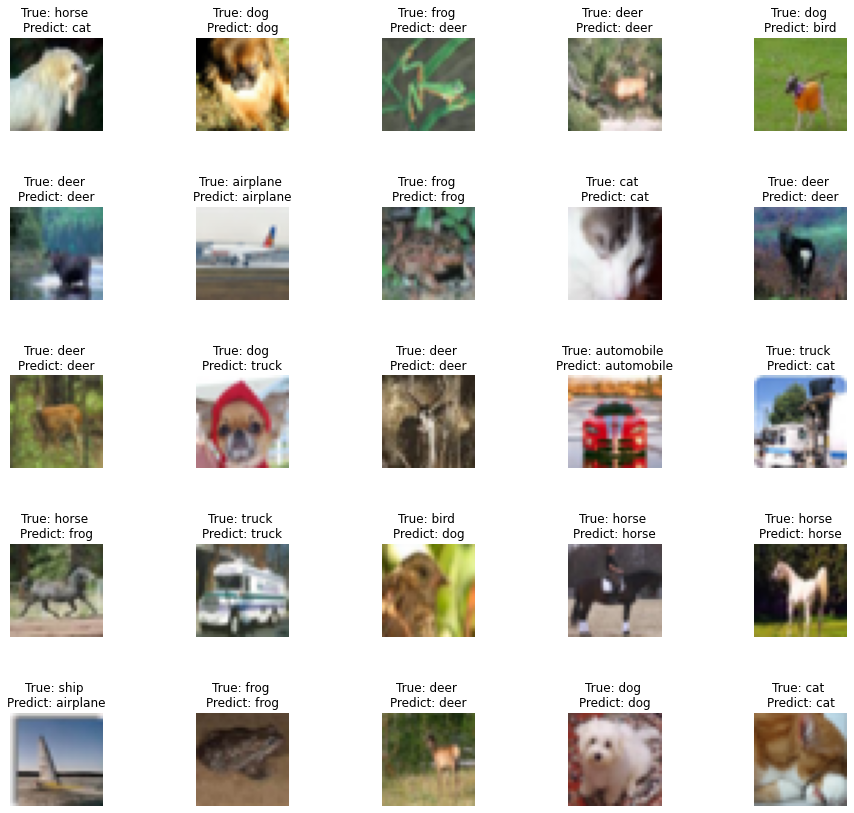

In [30]:
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(norm_test[i])
    # axes[i].set_title("True: %s \nPredict: %s" % (list(map(Y_test[i],class_names[y_pred[i]]))))
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[int(Y_test_1[i])], class_names[y_pred[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [31]:
layer_names = [layer.name for layer in model.layers]
layer_names

['conv2d',
 'batch_normalization',
 'conv2d_1',
 'batch_normalization_1',
 'max_pooling2d',
 'dropout',
 'conv2d_2',
 'batch_normalization_2',
 'conv2d_3',
 'batch_normalization_3',
 'conv2d_4',
 'batch_normalization_4',
 'max_pooling2d_1',
 'dropout_1',
 'flatten',
 'dense',
 'dropout_2',
 'batch_normalization_5',
 'dense_1']

In [32]:
x = norm_train[5]
input = x.reshape((1,) + x.shape)
layer_outputs = [layer.output for layer in model.layers[1:]] 
activation_model = tf.keras.models.Model(model.input, layer_outputs) 
activations = activation_model.predict(input)

1/1 [==============================] - 0s 247ms/step


In [33]:
cm = confusion_matrix(Y_test_1, y_pred)

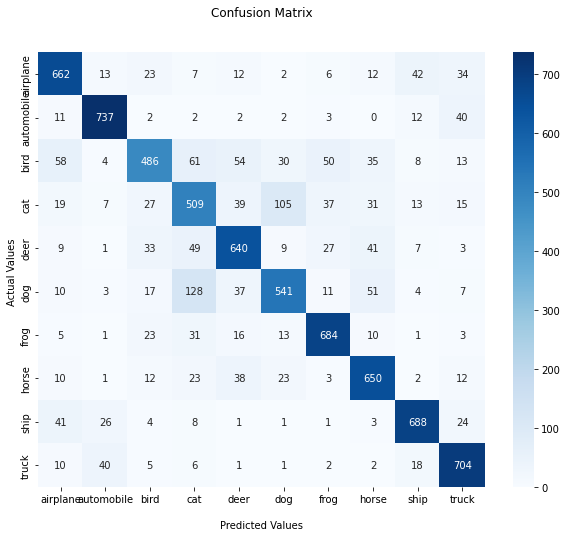

In [34]:
plt.rcParams["figure.figsize"] = (10,8)
ax = sns.heatmap(cm, annot=True, cmap='Blues',fmt='g')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## labels 
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
plt.show()

In [35]:
print(classification_report(Y_test_1, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.79      0.81      0.80       813
  automobile       0.88      0.91      0.90       811
        bird       0.77      0.61      0.68       799
         cat       0.62      0.63      0.63       802
        deer       0.76      0.78      0.77       819
         dog       0.74      0.67      0.70       809
        frog       0.83      0.87      0.85       787
       horse       0.78      0.84      0.81       774
        ship       0.87      0.86      0.86       797
       truck       0.82      0.89      0.86       789

    accuracy                           0.79      8000
   macro avg       0.79      0.79      0.79      8000
weighted avg       0.79      0.79      0.79      8000



(1, 30, 30, 16)
(1, 28, 28, 16)
(1, 28, 28, 16)
(1, 14, 14, 16)
(1, 14, 14, 16)
(1, 12, 12, 32)
(1, 12, 12, 32)
(1, 10, 10, 32)
(1, 10, 10, 32)
(1, 8, 8, 64)
(1, 8, 8, 64)
(1, 4, 4, 64)
(1, 4, 4, 64)
(1, 1024)
(1, 128)
(1, 128)
(1, 128)
(1, 10)


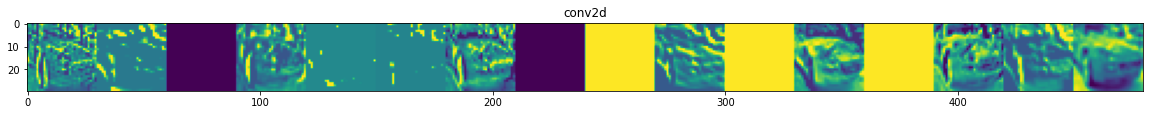

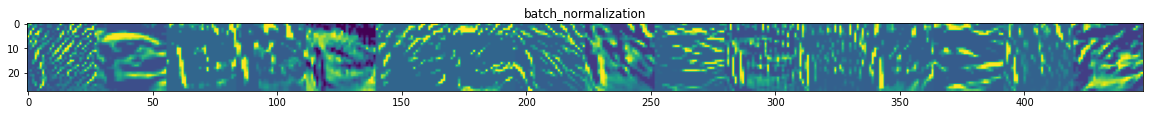

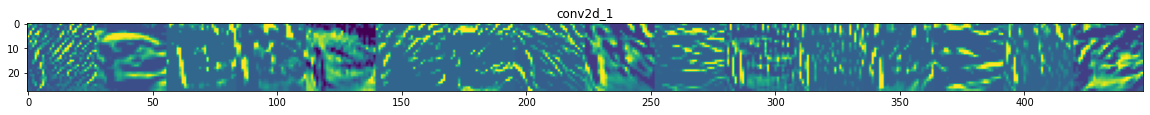

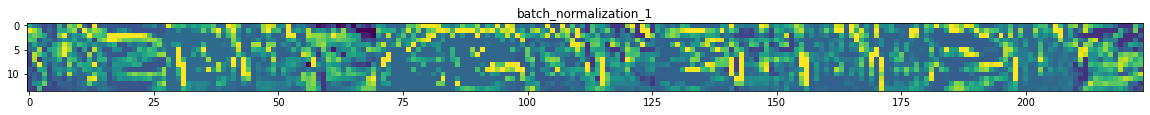

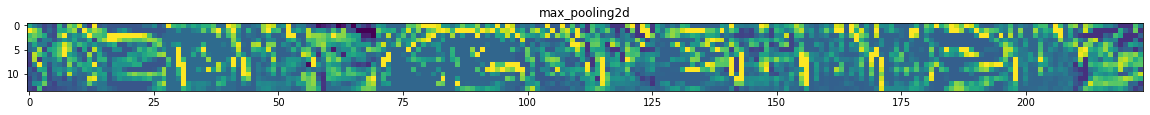

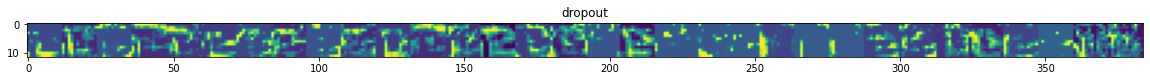

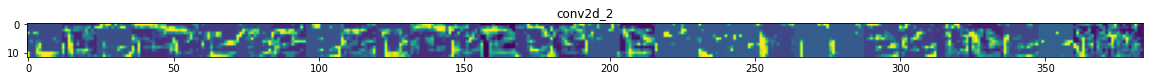

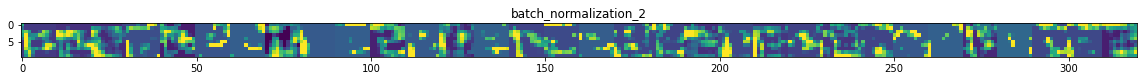

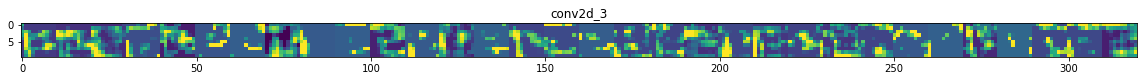

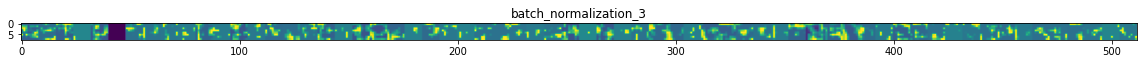

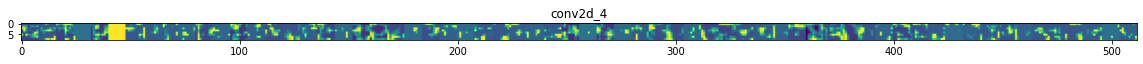

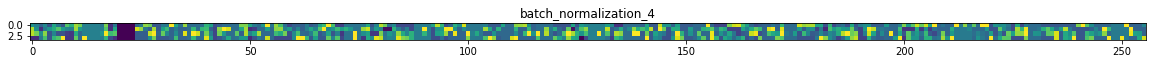

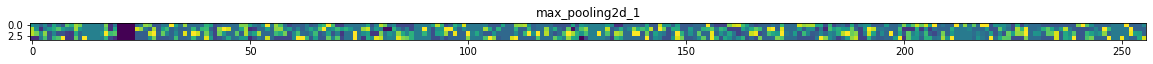

In [36]:
# Feature map

for layer_name, feature_map in zip(layer_names, activations):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size  = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

# Sequential Convolutional 2D Model

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.layers import Dropout

In [38]:
input_shape = 32,32,3

# define the Convolutional Neural Network
model = Sequential()
model.add(Conv2D(64,kernel_size=(3,3),input_shape = input_shape,padding="valid")) # 64 filters/output nodes

model.add(Conv2D(64,kernel_size=(3,3)))

model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(10,activation='softmax'))

# Your Code HERE
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                125450    
                                                                 
Total params: 164,170
Trainable params: 164,170
Non-trainable params: 0
________________________________________________

In [42]:
epochs = 50
batch_size = 64

In [43]:
# Compiling the model and training including the files of compile and fit
#Your code 
#model.compile()
opt = tf.keras.optimizers.Adam(learning_rate=0.1) #learning rate 0.1
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

#Train the model with training and validation set
history = model.fit(norm_train, Y_train, epochs=50, batch_size=64, validation_data=(norm_val, Y_val), verbose=2)

Epoch 1/50
782/782 - 5s - loss: 36287.4062 - accuracy: 0.3520 - val_loss: 12783.2881 - val_accuracy: 0.3070 - 5s/epoch - 6ms/step
Epoch 2/50
782/782 - 5s - loss: 1293.4919 - accuracy: 0.4606 - val_loss: 480.2018 - val_accuracy: 0.4725 - 5s/epoch - 6ms/step
Epoch 3/50
782/782 - 4s - loss: 300.8717 - accuracy: 0.5004 - val_loss: 238.9338 - val_accuracy: 0.4955 - 4s/epoch - 6ms/step
Epoch 4/50
782/782 - 4s - loss: 330917.7812 - accuracy: 0.4034 - val_loss: 10002.0254 - val_accuracy: 0.3395 - 4s/epoch - 6ms/step
Epoch 5/50
782/782 - 4s - loss: 3949.7393 - accuracy: 0.3661 - val_loss: 2033.4189 - val_accuracy: 0.4140 - 4s/epoch - 6ms/step
Epoch 6/50
782/782 - 5s - loss: 1527.2358 - accuracy: 0.4249 - val_loss: 2066.0857 - val_accuracy: 0.2475 - 5s/epoch - 6ms/step
Epoch 7/50
782/782 - 5s - loss: 959.7235 - accuracy: 0.4598 - val_loss: 540.6447 - val_accuracy: 0.5080 - 5s/epoch - 6ms/step
Epoch 8/50
782/782 - 5s - loss: 43295.7148 - accuracy: 0.4063 - val_loss: 1372.3331 - val_accuracy: 0.46

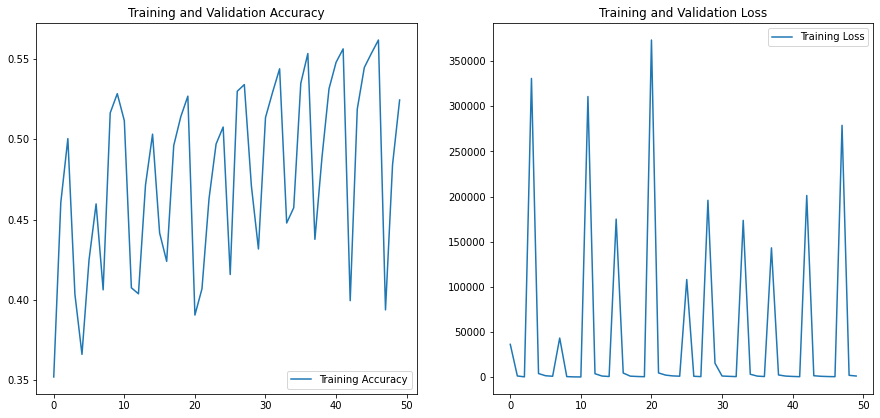

In [44]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [45]:
# Test the model on a testing dataset
# Your Code HERE
trainingAccuracy = model.evaluate(norm_train,Y_train,verbose=0)
testingAccuracy = model.evaluate(norm_val,Y_val,verbose=0)

In [46]:
trainingAccuracy[1]

0.4744200110435486

In [47]:
testingAccuracy[1]

0.4235000014305115

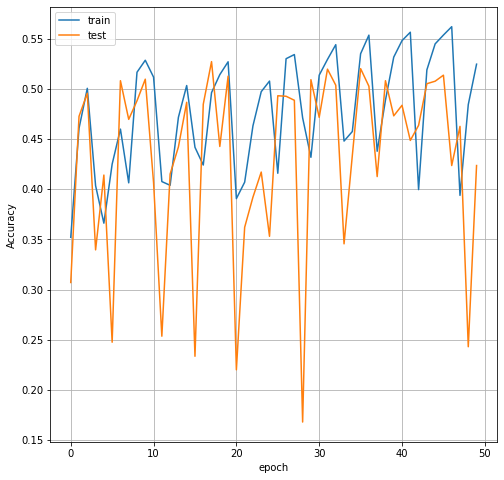

In [48]:
plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

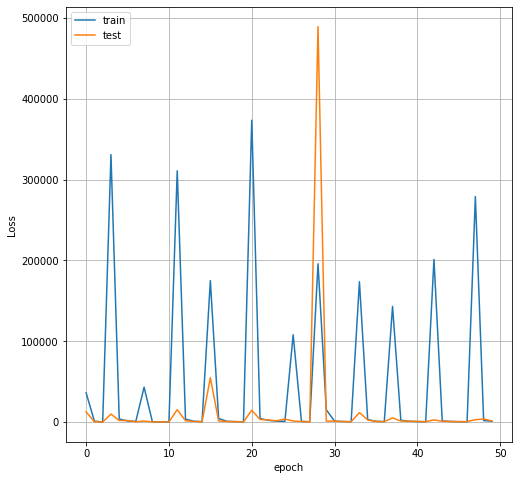

In [49]:
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'], label='Training Accuracy')
plt.plot(history.history['val_loss'], label='Test Accuracy')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

In [50]:
y_pred = model.predict(norm_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred.shape

250/250 [==============================] - 1s 2ms/step


(8000,)

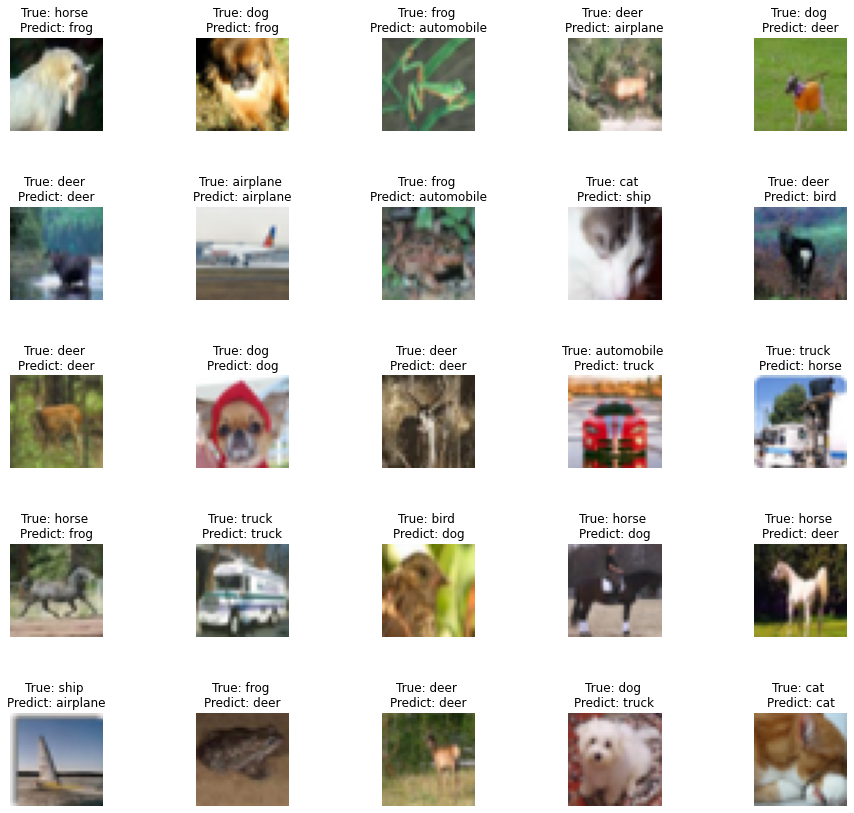

In [51]:
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(norm_test[i])
    # axes[i].set_title("True: %s \nPredict: %s" % (list(map(Y_test[i],class_names[y_pred[i]]))))
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[int(Y_test_1[i])], class_names[y_pred[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [52]:
layer_names = [layer.name for layer in model.layers]
layer_names

['conv2d_5', 'conv2d_6', 'max_pooling2d_2', 'flatten_1', 'dense_2']

In [53]:
x = norm_train[5]
input = x.reshape((1,) + x.shape)
layer_outputs = [layer.output for layer in model.layers[1:]] 
activation_model = tf.keras.models.Model(model.input, layer_outputs) 
activations = activation_model.predict(input)

1/1 [==============================] - 0s 85ms/step


In [54]:
cm = confusion_matrix(Y_test_1, y_pred)

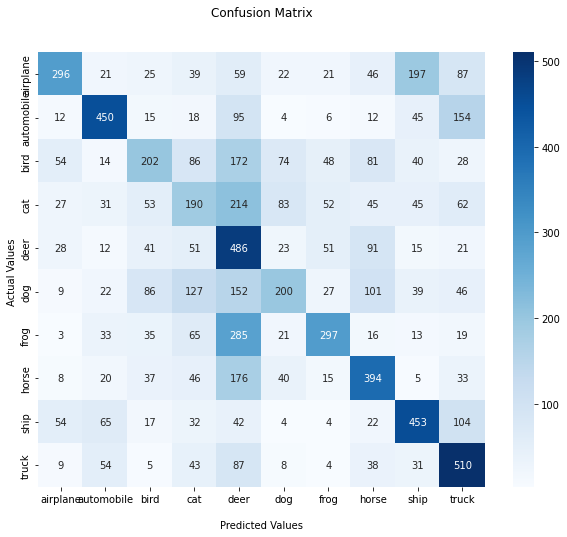

In [55]:
plt.rcParams["figure.figsize"] = (10,8)
ax = sns.heatmap(cm, annot=True, cmap='Blues',fmt='g')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## labels 
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
plt.show()

In [56]:
print(classification_report(Y_test_1, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.59      0.36      0.45       813
  automobile       0.62      0.55      0.59       811
        bird       0.39      0.25      0.31       799
         cat       0.27      0.24      0.25       802
        deer       0.27      0.59      0.38       819
         dog       0.42      0.25      0.31       809
        frog       0.57      0.38      0.45       787
       horse       0.47      0.51      0.49       774
        ship       0.51      0.57      0.54       797
       truck       0.48      0.65      0.55       789

    accuracy                           0.43      8000
   macro avg       0.46      0.44      0.43      8000
weighted avg       0.46      0.43      0.43      8000



(1, 28, 28, 64)
(1, 14, 14, 64)
(1, 12544)
(1, 10)


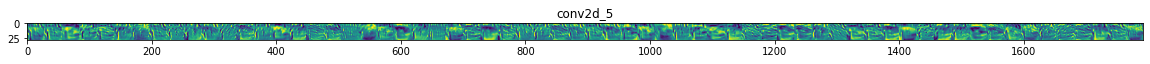

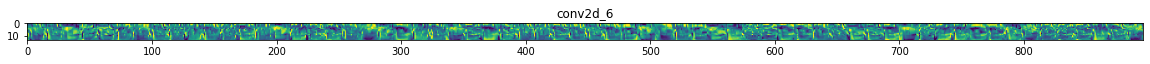

In [57]:
# Feature map

for layer_name, feature_map in zip(layer_names, activations):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size  = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

# Sequential Model with L1 regularization

In [58]:
from keras.regularizers import l1
# Your code HERE
model_l1 = Sequential()
model_l1.add(Conv2D(64,kernel_size=(3,3),input_shape = input_shape, kernel_regularizer=l1(0.1),bias_regularizer=l1(0.1),padding="valid")) # 32 filters/outputs 
# add batch normalisation
model_l1.add(MaxPooling2D((2, 2)))  # apply 2x2 max pooling filter

model_l1.add(Dropout(0.8))  # apply dropout

model_l1.add(Flatten())

model_l1.add(Dense(10,activation='softmax',kernel_regularizer=l1(0.01),bias_regularizer=l1(0.01)))

model_l1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 14400)             0         
                                                                 
 dense_3 (Dense)             (None, 10)                144010    
                                                                 
Total params: 145,802
Trainable params: 145,802
Non-trainable params: 0
________________________________________________

In [59]:
opt = tf.keras.optimizers.Adagrad(learning_rate=0.1) #
model_l1.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [60]:
history = model_l1.fit(norm_train, Y_train, epochs=50, batch_size=64, validation_data=(norm_val, Y_val), verbose=2)

Epoch 1/50
782/782 - 3s - loss: 12.6022 - accuracy: 0.1056 - val_loss: 3.3643 - val_accuracy: 0.1130 - 3s/epoch - 4ms/step
Epoch 2/50
782/782 - 3s - loss: 3.3155 - accuracy: 0.0997 - val_loss: 3.2742 - val_accuracy: 0.1015 - 3s/epoch - 4ms/step
Epoch 3/50
782/782 - 3s - loss: 3.2375 - accuracy: 0.0969 - val_loss: 3.2064 - val_accuracy: 0.1065 - 3s/epoch - 3ms/step
Epoch 4/50
782/782 - 3s - loss: 3.1775 - accuracy: 0.0997 - val_loss: 3.1529 - val_accuracy: 0.0935 - 3s/epoch - 4ms/step
Epoch 5/50
782/782 - 3s - loss: 3.1292 - accuracy: 0.1012 - val_loss: 3.1101 - val_accuracy: 0.1130 - 3s/epoch - 3ms/step
Epoch 6/50
782/782 - 3s - loss: 3.0891 - accuracy: 0.0997 - val_loss: 3.0734 - val_accuracy: 0.0945 - 3s/epoch - 4ms/step
Epoch 7/50
782/782 - 3s - loss: 3.0550 - accuracy: 0.0996 - val_loss: 3.0392 - val_accuracy: 0.0990 - 3s/epoch - 3ms/step
Epoch 8/50
782/782 - 3s - loss: 3.0254 - accuracy: 0.0981 - val_loss: 3.0127 - val_accuracy: 0.1055 - 3s/epoch - 4ms/step
Epoch 9/50
782/782 - 3s

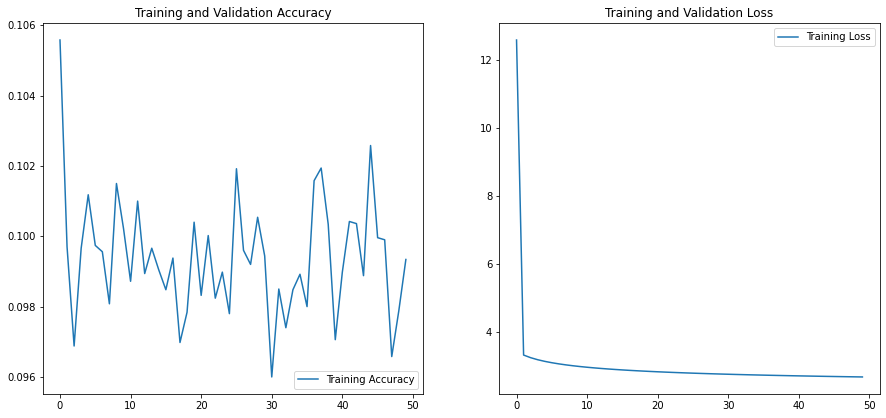

In [61]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [62]:
trainingAccuracy = model_l1.evaluate(norm_train,Y_train,verbose=0)
testingAccuracy = model_l1.evaluate(norm_val,Y_val,verbose=0)

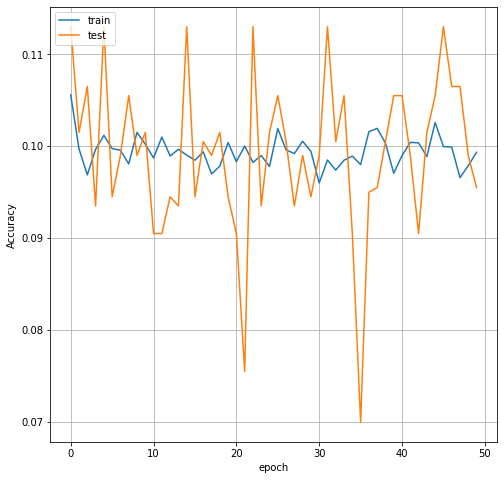

In [63]:
plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

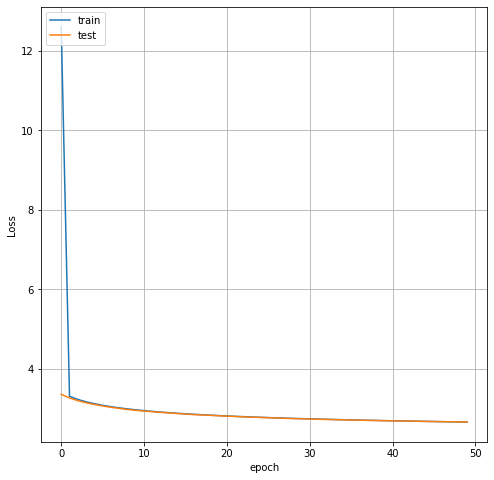

In [64]:
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'], label='Training Accuracy')
plt.plot(history.history['val_loss'], label='Test Accuracy')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

In [65]:
y_pred = model_l1.predict(norm_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred.shape

250/250 [==============================] - 1s 2ms/step


(8000,)

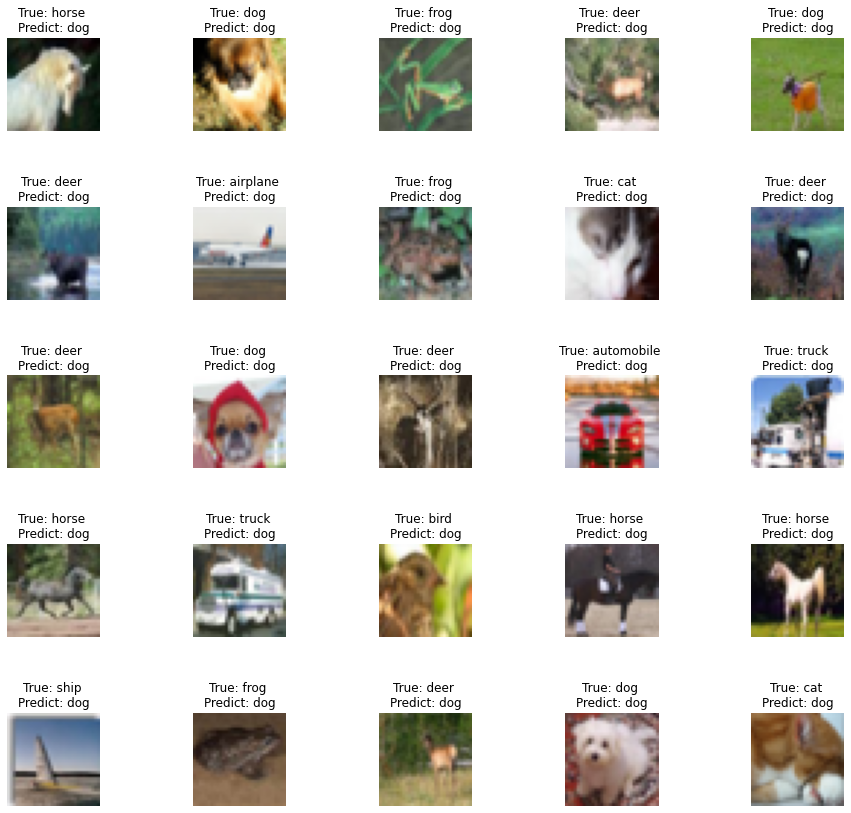

In [66]:
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(norm_test[i])
    # axes[i].set_title("True: %s \nPredict: %s" % (list(map(Y_test[i],class_names[y_pred[i]]))))
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[int(Y_test_1[i])], class_names[y_pred[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [67]:
layer_names = [layer.name for layer in model_l1.layers]
layer_names

['conv2d_7', 'max_pooling2d_3', 'dropout_3', 'flatten_2', 'dense_3']

In [68]:
x = norm_train[5]
input = x.reshape((1,) + x.shape)
layer_outputs = [layer.output for layer in model_l1.layers[1:]] 
activation_model = tf.keras.models.Model(model_l1.input, layer_outputs) 
activations = activation_model.predict(input)

1/1 [==============================] - 0s 61ms/step


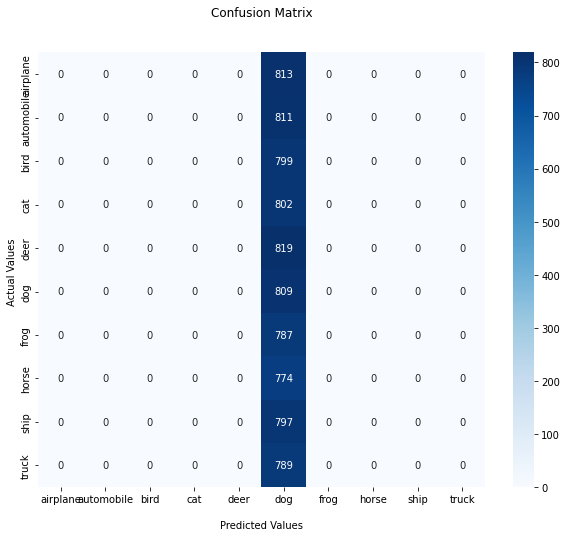

In [69]:
cm = confusion_matrix(Y_test_1, y_pred)
plt.rcParams["figure.figsize"] = (10,8)
ax = sns.heatmap(cm, annot=True, cmap='Blues',fmt='g')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## labels 
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
plt.show()

In [70]:
print(classification_report(Y_test_1, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.00      0.00      0.00       813
  automobile       0.00      0.00      0.00       811
        bird       0.00      0.00      0.00       799
         cat       0.00      0.00      0.00       802
        deer       0.00      0.00      0.00       819
         dog       0.10      1.00      0.18       809
        frog       0.00      0.00      0.00       787
       horse       0.00      0.00      0.00       774
        ship       0.00      0.00      0.00       797
       truck       0.00      0.00      0.00       789

    accuracy                           0.10      8000
   macro avg       0.01      0.10      0.02      8000
weighted avg       0.01      0.10      0.02      8000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(1, 15, 15, 64)
(1, 15, 15, 64)
(1, 14400)
(1, 10)


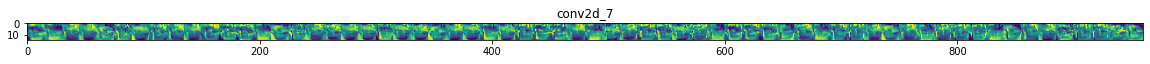

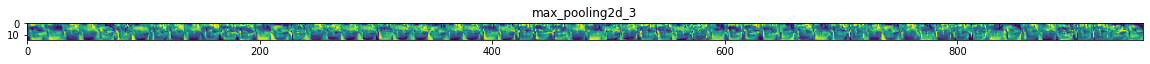

In [71]:
for layer_name, feature_map in zip(layer_names, activations):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size  = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

# Sequential Model with L2 regularization

In [72]:

from keras.regularizers import l2

model_l2 = Sequential()
model_l2.add(Conv2D(32,kernel_size=(3,3),input_shape = input_shape, kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01),padding="valid")) # 32 filters/outputs 

model_l2.add(MaxPooling2D((2, 2)))

model_l2.add(Dropout(0.8)) 

model_l2.add(Flatten())

model_l2.add(Dense(10,activation='softmax',kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))

model_l2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 7200)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                72010     
                                                                 
Total params: 72,906
Trainable params: 72,906
Non-trainable params: 0
__________________________________________________

In [73]:
opt = tf.keras.optimizers.Adagrad(learning_rate=0.1) #
model_l2.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [74]:
history = model_l2.fit(norm_train, Y_train, epochs=50, batch_size=64, validation_data=(norm_val, Y_val), verbose=2)

Epoch 1/50
782/782 - 3s - loss: 5.3752 - accuracy: 0.3526 - val_loss: 1.9481 - val_accuracy: 0.4225 - 3s/epoch - 4ms/step
Epoch 2/50
782/782 - 3s - loss: 1.9283 - accuracy: 0.4168 - val_loss: 1.8748 - val_accuracy: 0.4410 - 3s/epoch - 3ms/step
Epoch 3/50
782/782 - 3s - loss: 1.8989 - accuracy: 0.4281 - val_loss: 1.8538 - val_accuracy: 0.4605 - 3s/epoch - 3ms/step
Epoch 4/50
782/782 - 3s - loss: 1.8842 - accuracy: 0.4351 - val_loss: 1.8487 - val_accuracy: 0.4640 - 3s/epoch - 3ms/step
Epoch 5/50
782/782 - 3s - loss: 1.8742 - accuracy: 0.4416 - val_loss: 1.8529 - val_accuracy: 0.4500 - 3s/epoch - 3ms/step
Epoch 6/50
782/782 - 2s - loss: 1.8666 - accuracy: 0.4449 - val_loss: 1.8563 - val_accuracy: 0.4380 - 2s/epoch - 3ms/step
Epoch 7/50
782/782 - 2s - loss: 1.8585 - accuracy: 0.4445 - val_loss: 1.8176 - val_accuracy: 0.4705 - 2s/epoch - 3ms/step
Epoch 8/50
782/782 - 2s - loss: 1.8547 - accuracy: 0.4460 - val_loss: 1.8123 - val_accuracy: 0.4810 - 2s/epoch - 3ms/step
Epoch 9/50
782/782 - 3s 

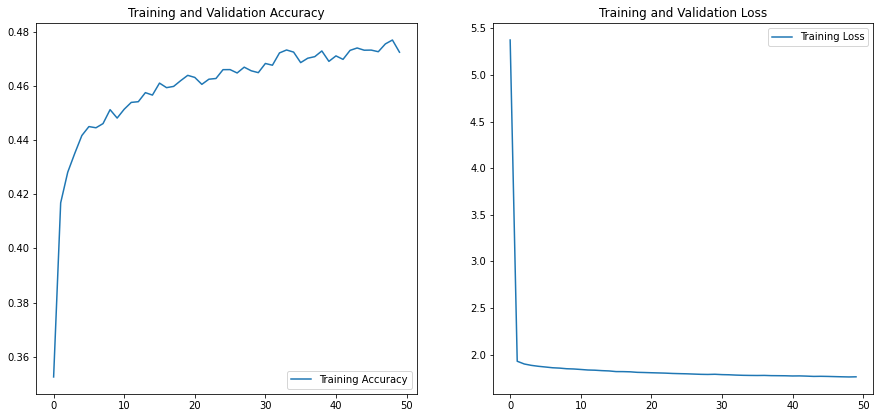

In [75]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [76]:
trainingAccuracy = model_l2.evaluate(norm_train,Y_train,verbose=0)
testingAccuracy = model_l2.evaluate(norm_val,Y_val,verbose=0)

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()


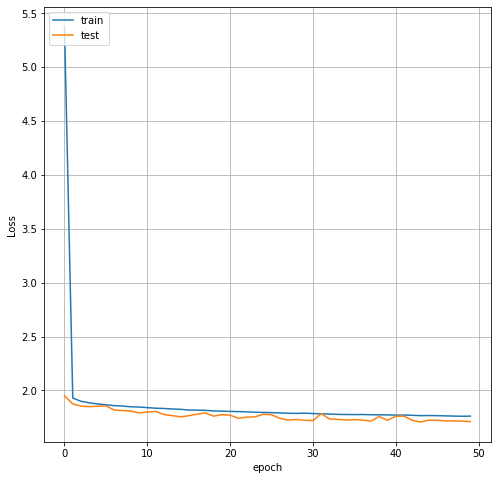

In [78]:
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'], label='Training Accuracy')
plt.plot(history.history['val_loss'], label='Test Accuracy')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

In [79]:
y_pred = model_l2.predict(norm_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred.shape

250/250 [==============================] - 0s 2ms/step


(8000,)

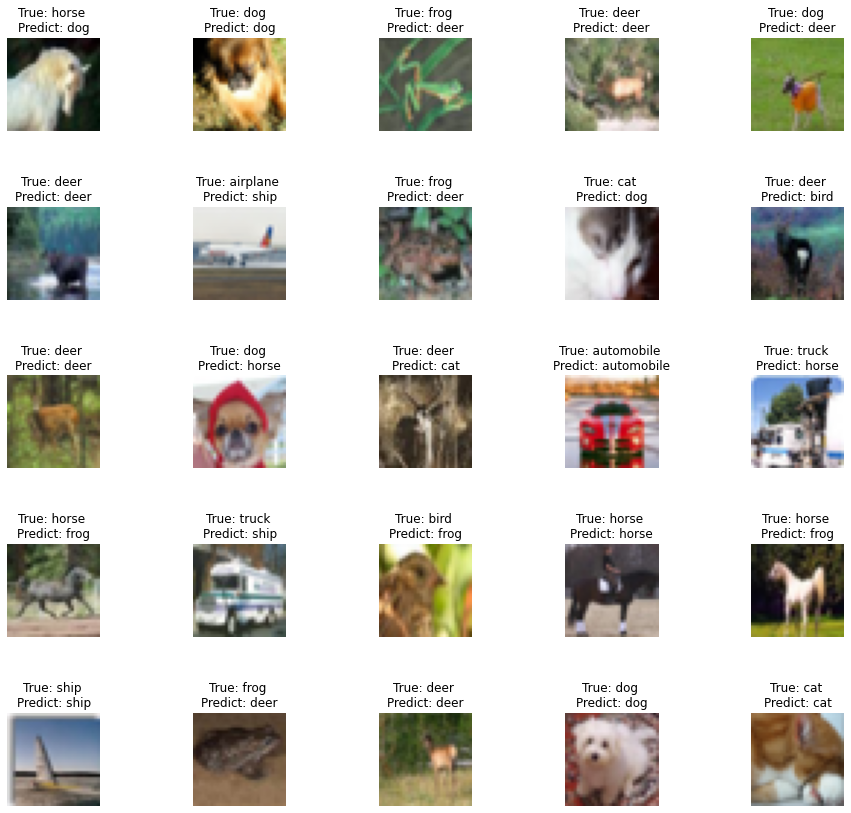

In [80]:
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(norm_test[i])
    # axes[i].set_title("True: %s \nPredict: %s" % (list(map(Y_test[i],class_names[y_pred[i]]))))
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[int(Y_test_1[i])], class_names[y_pred[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [81]:
layer_names = [layer.name for layer in model_l2.layers]
layer_names

['conv2d_8', 'max_pooling2d_4', 'dropout_4', 'flatten_3', 'dense_4']

In [82]:
x = norm_train[5]
input = x.reshape((1,) + x.shape)
layer_outputs = [layer.output for layer in model_l2.layers[1:]] 
activation_model = tf.keras.models.Model(model_l2.input, layer_outputs) 
activations = activation_model.predict(input)

1/1 [==============================] - 0s 73ms/step


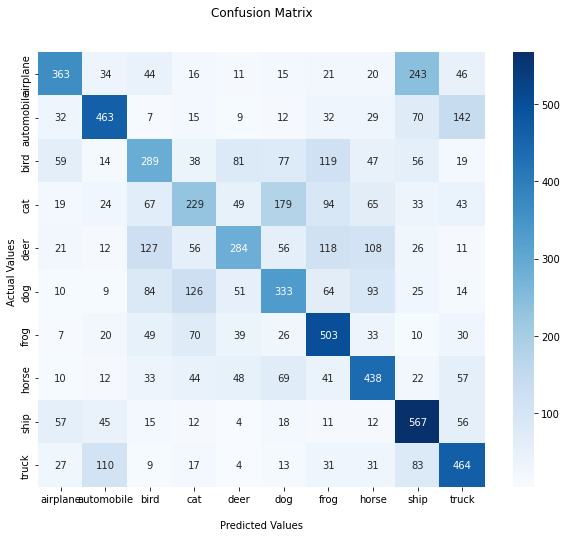

In [83]:
cm = confusion_matrix(Y_test_1, y_pred)
plt.rcParams["figure.figsize"] = (10,8)
ax = sns.heatmap(cm, annot=True, cmap='Blues',fmt='g')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## labels 
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
plt.show()

In [84]:
print(classification_report(Y_test_1, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.60      0.45      0.51       813
  automobile       0.62      0.57      0.60       811
        bird       0.40      0.36      0.38       799
         cat       0.37      0.29      0.32       802
        deer       0.49      0.35      0.41       819
         dog       0.42      0.41      0.41       809
        frog       0.49      0.64      0.55       787
       horse       0.50      0.57      0.53       774
        ship       0.50      0.71      0.59       797
       truck       0.53      0.59      0.56       789

    accuracy                           0.49      8000
   macro avg       0.49      0.49      0.49      8000
weighted avg       0.49      0.49      0.48      8000



(1, 15, 15, 32)
(1, 15, 15, 32)
(1, 7200)
(1, 10)


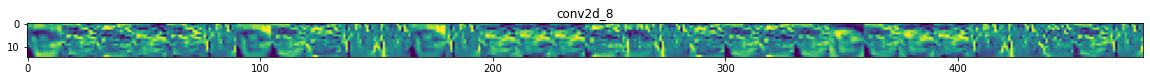

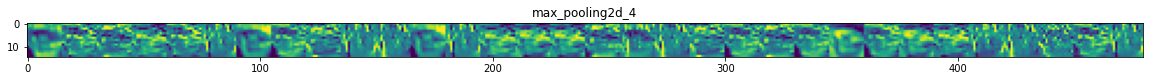

In [85]:
for layer_name, feature_map in zip(layer_names, activations):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size  = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

# Resnet 50 Model

In [86]:
# load pre-trained resnet 50 from libarary
# your Code HERE
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50


# load model
restnet = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
#output = restnet.layers[-1].output
#output = tensorflow.keras.layers.Flatten()(output)
#restnet = Model(restnet.input, output=output)

for layer in restnet.layers:
    layer.trainable = True
restnet.summary()

94765736/94765736 [==============================] - 2s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                          

In [87]:
#all Freeze for training except ['res5c_branch2b', 'res5c_branch2c', 'activation_97']
import pandas as pd
restnet.trainable = True
set_trainable = False
for layer in restnet.layers:
    if layer.name in ['res5c_branch2b', 'res5c_branch2c', 'activation_97']: # setting three suggested layers to trainable and freeze rest
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
layers = [(layer, layer.name, layer.trainable) for layer in restnet.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

Layer Type           Layer Name  \
0    <keras.engine.input_layer.InputLayer object at...              input_1   
1    <keras.layers.reshaping.zero_padding2d.ZeroPad...            conv1_pad   
2    <keras.layers.convolutional.conv2d.Conv2D obje...           conv1_conv   
3    <keras.layers.normalization.batch_normalizatio...             conv1_bn   
4    <keras.layers.core.activation.Activation objec...           conv1_relu   
..                                                 ...                  ...   
170  <keras.layers.core.activation.Activation objec...  conv5_block3_2_relu   
171  <keras.layers.convolutional.conv2d.Conv2D obje...  conv5_block3_3_conv   
172  <keras.layers.normalization.batch_normalizatio...    conv5_block3_3_bn   
173  <keras.layers.merging.add.Add object at 0x7f8b...     conv5_block3_add   
174  <keras.layers.core.activation.Activation objec...     conv5_block3_out   

     Layer Trainable  
0              False  
1              False  
2              False  
3              False  
4              False  
..               ...  
170            False  
171            False  
172            False  
173            False  
174            False  

[175 rows x 3 columns]

In [88]:
#all Freeze for training except ['res5c_branch2b', 'res5c_branch2c', 'activation_97']
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
model_finetuned0 = Sequential()
model_finetuned0.add(restnet)

model_finetuned0.add(Dropout(0.3))

model_finetuned0.add(Dropout(0.3))

model_finetuned0.add(Flatten())

#model_finetuned0.add(Dense(10, activation='sigmoid'))
#model_finetuned0.add(Dense(10, activation='relu'))
model_finetuned0.add(Dense(10,activation='softmax',kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))


opt = tf.keras.optimizers.Adam(learning_rate=0.001) #
model_finetuned0.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
#model_finetuned0.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-5),metrics=['accuracy'])
model_finetuned0.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 dropout_5 (Dropout)         (None, 1, 1, 2048)        0         
                                                                 
 dropout_6 (Dropout)         (None, 1, 1, 2048)        0         
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_5 (Dense)             (None, 10)                20490     
                                                                 
Total params: 23,608,202
Trainable params: 20,490
Non-trainable params: 23,587,712
_________________________________________________________________


In [89]:
history = model_finetuned0.fit(norm_train, Y_train, epochs=50, batch_size=64, validation_data=(norm_val, Y_val), verbose=2)

Epoch 1/50
782/782 - 16s - loss: 2.3789 - accuracy: 0.1664 - val_loss: 2.1290 - val_accuracy: 0.2335 - 16s/epoch - 20ms/step
Epoch 2/50
782/782 - 11s - loss: 2.2188 - accuracy: 0.1962 - val_loss: 2.1289 - val_accuracy: 0.2760 - 11s/epoch - 14ms/step
Epoch 3/50
782/782 - 11s - loss: 2.2162 - accuracy: 0.1983 - val_loss: 2.1326 - val_accuracy: 0.2585 - 11s/epoch - 14ms/step
Epoch 4/50
782/782 - 11s - loss: 2.2150 - accuracy: 0.1951 - val_loss: 2.1157 - val_accuracy: 0.2685 - 11s/epoch - 14ms/step
Epoch 5/50
782/782 - 11s - loss: 2.2175 - accuracy: 0.1963 - val_loss: 2.1141 - val_accuracy: 0.2460 - 11s/epoch - 14ms/step
Epoch 6/50
782/782 - 11s - loss: 2.2131 - accuracy: 0.1972 - val_loss: 2.1322 - val_accuracy: 0.2335 - 11s/epoch - 14ms/step
Epoch 7/50
782/782 - 11s - loss: 2.2129 - accuracy: 0.1997 - val_loss: 2.1295 - val_accuracy: 0.2275 - 11s/epoch - 14ms/step
Epoch 8/50
782/782 - 11s - loss: 2.2130 - accuracy: 0.1976 - val_loss: 2.1395 - val_accuracy: 0.2290 - 11s/epoch - 14ms/step


In [90]:
trainingAccuracy = model_finetuned0.evaluate(norm_train,Y_train,verbose=0)
testingAccuracy = model_finetuned0.evaluate(norm_val,Y_val,verbose=0)

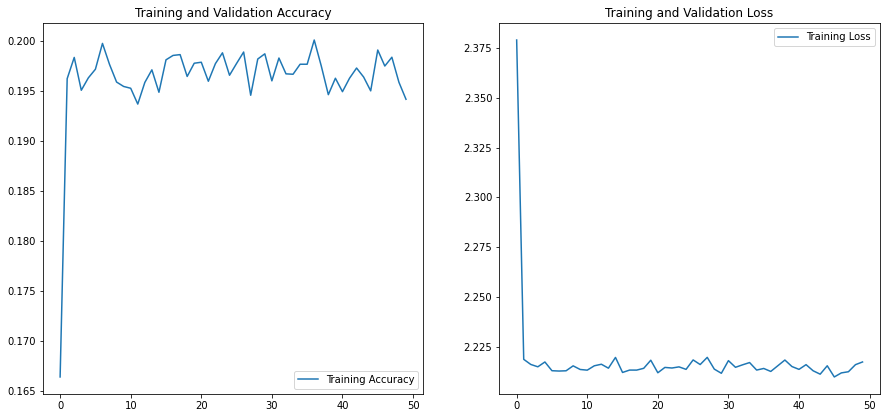

In [91]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

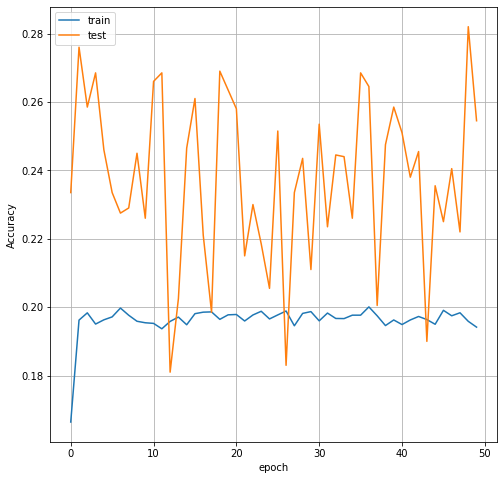

In [92]:
plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

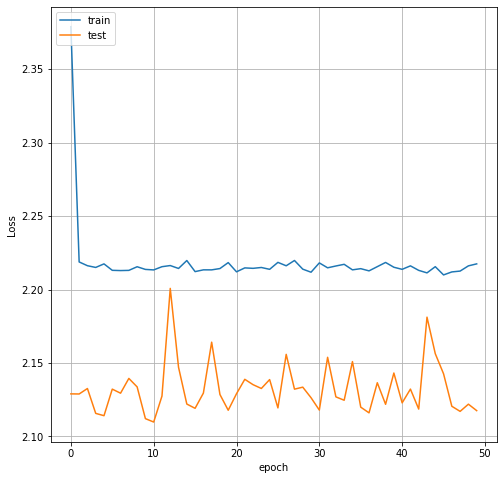

In [93]:
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'], label='Training Accuracy')
plt.plot(history.history['val_loss'], label='Test Accuracy')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

In [94]:
y_pred = model_finetuned0.predict(norm_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred.shape

250/250 [==============================] - 4s 11ms/step


(8000,)

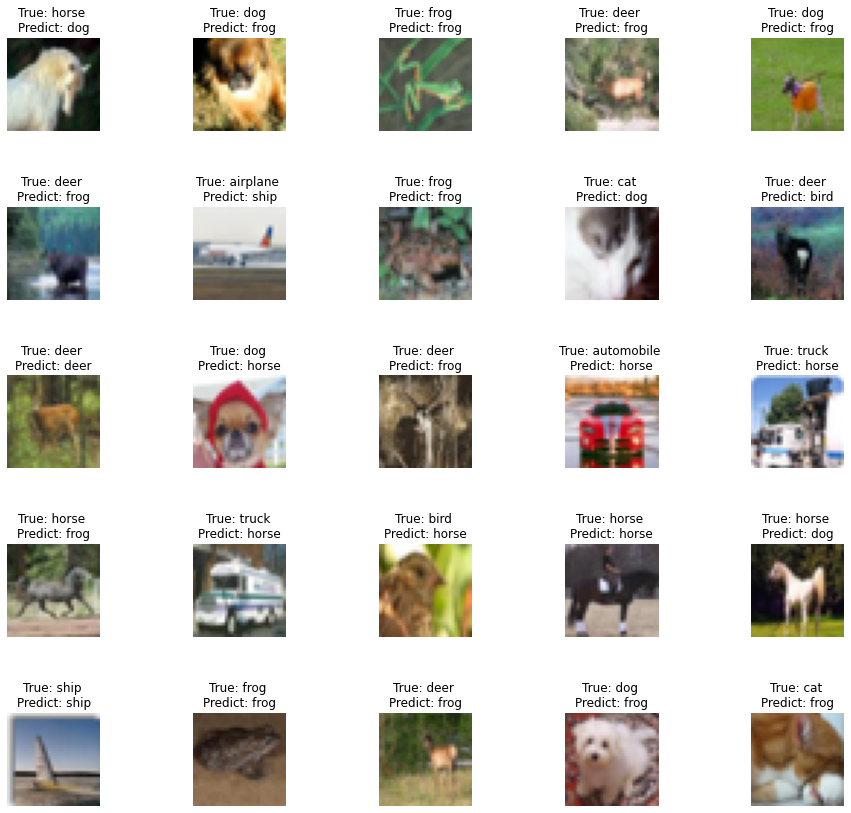

In [95]:
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(norm_test[i])
    # axes[i].set_title("True: %s \nPredict: %s" % (list(map(Y_test[i],class_names[y_pred[i]]))))
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[int(Y_test_1[i])], class_names[y_pred[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [96]:
layer_names = [layer.name for layer in model_finetuned0.layers]
layer_names

['resnet50', 'dropout_5', 'dropout_6', 'flatten_4', 'dense_5']

In [97]:
x = norm_train[5]
input = x.reshape((1,) + x.shape)
layer_outputs = [layer.output for layer in model_finetuned0.layers[1:]] 
activation_model = tf.keras.models.Model(model_finetuned0.input, layer_outputs) 
activations = activation_model.predict(input)

1/1 [==============================] - 1s 1s/step


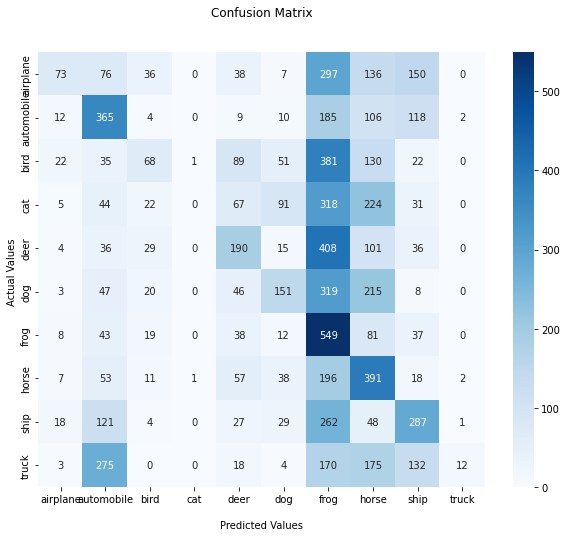

In [98]:
cm = confusion_matrix(Y_test_1, y_pred)
plt.rcParams["figure.figsize"] = (10,8)
ax = sns.heatmap(cm, annot=True, cmap='Blues',fmt='g')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## labels 
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
plt.show()

In [99]:
print(classification_report(Y_test_1, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.47      0.09      0.15       813
  automobile       0.33      0.45      0.38       811
        bird       0.32      0.09      0.13       799
         cat       0.00      0.00      0.00       802
        deer       0.33      0.23      0.27       819
         dog       0.37      0.19      0.25       809
        frog       0.18      0.70      0.28       787
       horse       0.24      0.51      0.33       774
        ship       0.34      0.36      0.35       797
       truck       0.71      0.02      0.03       789

    accuracy                           0.26      8000
   macro avg       0.33      0.26      0.22      8000
weighted avg       0.33      0.26      0.22      8000



(1, 1, 1, 2048)
(1, 1, 1, 2048)
(1, 2048)
(1, 10)


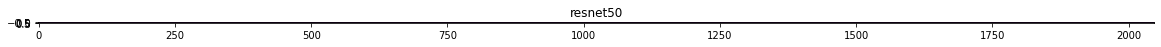

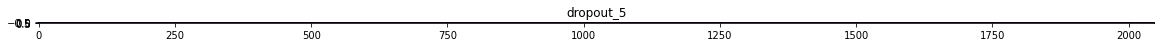

In [100]:
for layer_name, feature_map in zip(layer_names, activations):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size  = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

In [101]:
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D,  \
    Dropout, Dense, Input, concatenate,      \
    GlobalAveragePooling2D, AveragePooling2D,\
    Flatten

import cv2 
import numpy as np 
from keras.datasets import cifar10 
from keras import backend as K 
from keras.utils import np_utils

import math 
from keras.optimizers import SGD 
from keras.callbacks import LearningRateScheduler

We will then load the dataset and perform some preprocessing steps. This is a critical task before the deep learning model is trained.

In [102]:
num_classes = 10

def load_cifar10_data(img_rows, img_cols):

    # Load cifar10 training and validation sets
    (X_train, Y_train), (X_valid, Y_valid) = cifar10.load_data()

    # Resize training images
    X_train = np.array([cv2.resize(img, (img_rows,img_cols)) for img in X_train[:,:,:,:]])
    X_valid = np.array([cv2.resize(img, (img_rows,img_cols)) for img in X_valid[:,:,:,:]])

    # Transform targets to keras compatible format
    Y_train = np_utils.to_categorical(Y_train, num_classes)
    Y_valid = np_utils.to_categorical(Y_valid, num_classes)
    
    X_train = X_train.astype('float32')
    X_valid = X_valid.astype('float32')

    # preprocess data
    X_train = X_train / 255.0
    X_valid = X_valid / 255.0

    return X_train, Y_train, X_valid, Y_valid


Now, we will define our deep learning architecture. We will quickly define a function to do this, which, when given the necessary information, gives us back the entire inception layer.

In [104]:
def inception_module(x,
                     filters_1x1,
                     filters_3x3_reduce,
                     filters_3x3,
                     filters_5x5_reduce,
                     filters_5x5,
                     filters_pool_proj,
                     name=None):
    
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_5x5)

    pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(pool_proj)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)
    
    return output

# VGG16

In [105]:
#------------------------------------------------------------------------------
# VGG16 ON CIFAR_10
#------------------------------------------------------------------------------
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow.keras as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from keras.utils.np_utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score

In [106]:
#------------------------------------------------------------------------------
# Using VGG16 model, with weights pre-trained on ImageNet.
#------------------------------------------------------------------------------

vgg16_model = VGG16(weights='imagenet',
                    include_top=False, 
                    classes=10,
                    input_shape=(32,32,3)# input: 32x32 images with 3 channels -> (32, 32, 3) tensors.
                   )

58889256/58889256 [==============================] - 1s 0us/step


In [107]:
#Define the sequential model and add th VGG's layers to it
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [108]:
#------------------------------------------------------------------------------
# Adding hiddens  and output layer to our model
#------------------------------------------------------------------------------

from tensorflow.keras.layers import Dense, Flatten, Dropout
model.add(Flatten())
model.add(Dense(512, activation='relu', name='hidden1'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu', name='hidden2'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax', name='predictions'))

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)        

In [109]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [110]:
# Converting target to categorical 
Y_train = np_utils.to_categorical(Y_train,10)
Y_test = np_utils.to_categorical(Y_test,10)
# Y_val = np_utils.to_categorical(Y_val,10)

In [111]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [112]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# X_val = X_val.astype('float32')

# normalize to range 0-1
X_train = X_train/255.0
X_test = X_test/255.0
# X_val = X_val/255.0

In [113]:
print('Shape of X train = ', X_train.shape)
print('Shape of Y train = ', Y_train.shape)
print('Shape of X test = ', X_test.shape)
print('Shape of Y test = ', Y_test.shape)

Shape of X train =  (50000, 32, 32, 3)
Shape of Y train =  (50000, 10)
Shape of X test =  (10000, 32, 32, 3)
Shape of Y test =  (10000, 10)


In [114]:
X_val = X_train[40000:]
Y_val = Y_train[40000:]
print(X_val.shape)
print(Y_val.shape)

(10000, 32, 32, 3)
(10000, 10)


In [115]:
X_train = X_train[:40000]
Y_train = Y_train[:40000]
print(X_train.shape)
print(Y_train.shape)

(40000, 32, 32, 3)
(40000, 10)


In [116]:
X_train.dtype

dtype('float32')

In [117]:
Y_train.dtype

dtype('float32')

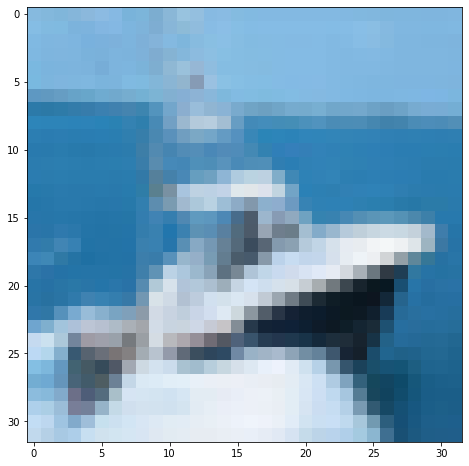

In [118]:
image=X_train[8,:].reshape((32,32,3))
plt.imshow(image)
plt.show()

In [119]:
#------------------------------------------------------------------------------
# TRAINING THE CNN ON THE TRAIN/VALIDATION DATA
#------------------------------------------------------------------------------

# initiate SGD optimizer
sgd = optimizers.SGD(lr=0.001, momentum=0.9)

# For a multi-class classification problem
model.compile(loss='categorical_crossentropy',optimizer= sgd,metrics=['accuracy'])


def lr_scheduler(epoch):
    return 0.001 * (0.5 ** (epoch // 20))
reduce_lr = LearningRateScheduler(lr_scheduler)

mc = ModelCheckpoint('./weights.h5', monitor='val_accuracy', save_best_only=True, mode='max')


# initialize the number of epochs and batch size
EPOCHS = 30
BS = 128

# construct the training image generator for data augmentation
aug = ImageDataGenerator(
    rotation_range=20, 
    zoom_range=0.15, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.15,
    horizontal_flip=True, 
    fill_mode="nearest")
 
# train the model
history = model.fit(
    aug.flow(X_train,Y_train, batch_size=BS),
    validation_data=(X_val,Y_val),
    steps_per_epoch=len(X_train) // BS,
    epochs=EPOCHS,
    callbacks=[reduce_lr,mc])

#We load the best weights saved by the ModelCheckpoint
model.load_weights('./weights.h5')

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


312/312 [==============================] - 33s 98ms/step - loss: 1.7387 - accuracy: 0.3663 - val_loss: 1.1092 - val_accuracy: 0.6007 - lr: 0.0010
Epoch 2/30
312/312 [==============================] - 28s 90ms/step - loss: 1.1867 - accuracy: 0.5922 - val_loss: 0.8501 - val_accuracy: 0.7029 - lr: 0.0010
Epoch 3/30
312/312 [==============================] - 30s 98ms/step - loss: 1.0015 - accuracy: 0.6608 - val_loss: 0.7382 - val_accuracy: 0.7497 - lr: 0.0010
Epoch 4/30
312/312 [==============================] - 29s 92ms/step - loss: 0.9081 - accuracy: 0.6952 - val_loss: 0.6856 - val_accuracy: 0.7688 - lr: 0.0010
Epoch 5/30
312/312 [==============================] - 28s 89ms/step - loss: 0.8295 - accuracy: 0.7179 - val_loss: 0.7624 - val_accuracy: 0.7454 - lr: 0.0010
Epoch 6/30
312/312 [==============================] - 28s 90ms/step - loss: 0.7696 - accuracy: 0.7435 - val_loss: 0.6277 - val_accuracy: 0.7864 - lr: 0.0010
Epoch 7/30
312/312 [==============================] - 29s 92ms/step -

In [120]:
train_loss, train_accuracy = model.evaluate_generator(aug.flow(X_train,Y_train, batch_size=BS), 156)
print('Training loss: {}\nTraining accuracy: {}'.format(train_loss, train_accuracy))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Training loss: 0.3335449695587158
Training accuracy: 0.8830128312110901


In [121]:
val_loss, val_accuracy = model.evaluate(X_val, Y_val)
print('Validation loss: {}\nValidation accuracy: {}'.format(val_loss, val_accuracy))

313/313 [==============================] - 3s 10ms/step - loss: 0.3876 - accuracy: 0.8722
Validation loss: 0.38758355379104614
Validation accuracy: 0.8722000122070312


In [122]:
test_loss, test_accuracy = model.evaluate(X_test,Y_test)
print('Testing loss: {}\nTesting accuracy: {}'.format(test_loss, test_accuracy))

313/313 [==============================] - 3s 10ms/step - loss: 0.4047 - accuracy: 0.8679
Testing loss: 0.4046569764614105
Testing accuracy: 0.867900013923645


# GAN for CIFAR-10

In [1]:
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.datasets.cifar10 import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout

from matplotlib import pyplot as plt
########################################################################

#Load data and plot to get a quick understanding
#CIFAR10 classes are: airplane, automobile, bird, cat, deer, dog, frog, horse,
# ship, truck

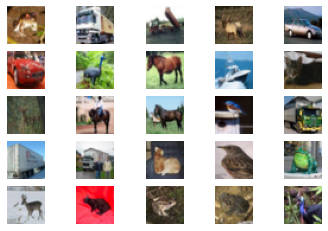

In [2]:
(trainX, trainy), (testX, testy) = load_data()

# plot 25 images
for i in range(25):
	plt.subplot(5, 5, 1 + i)
	plt.axis('off')
	plt.imshow(trainX[i])
plt.show()

In [3]:
#############################################################################
#Define generator, discriminator, gan and other helper functions
#Using Sequential method from Keras as it makes the definition of models easy.
#We will use functional way of defining the model for the conditional gan
#but sequential for descriminator and generator as they are straightforward.
#########################################################################

# define the standalone discriminator model
#Given an input image, the Discriminator outputs the likelihood of the image being real.
#Binary classification - true or false (1 or 0). So using sigmoid activation.
def define_discriminator(in_shape=(32,32,3)):
	model = Sequential()
	
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same', input_shape=in_shape)) #16x16x128
	model.add(LeakyReLU(alpha=0.2))
	
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same')) #8x8x128
	model.add(LeakyReLU(alpha=0.2))
	
	model.add(Flatten()) #shape of 8192
	model.add(Dropout(0.4))
	model.add(Dense(1, activation='sigmoid')) #shape of 1
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', metrics=['accuracy'])
	return model

test_discr = define_discriminator()
print(test_discr.summary())

# define the standalone generator model
# #Given input of latent vector, the Generator produces an image.(here: 32x32)
#latent_dim, for example, can be 100, 1D array of size 100 

#Here we are only using Dense and conv2dlayers. But network can be complicated based
#on the application. For example, you can use VGG for super res. GAN.  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 128)       3584      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16, 16, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dropout (Dropout)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 1)                 8

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [4]:
def define_generator(latent_dim):    #latent_dim is the dimension of the latent vector (e.g., 100)
	model = Sequential()
	# We will reshape input latent vector into 8x8 image as a starting point. 
    #So n_nodes for the Dense layer can be 128x8x8 so when we reshape the output 
    #it would be 8x8x128 and that can be slowly upscaled to 32x32 image for output.
	n_nodes = 128 * 8 * 8  #8192 nodes
	model.add(Dense(n_nodes, input_dim=latent_dim)) #Dense layer so we can work with 1D latent vector
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((8, 8, 128)))  #8x8x128 dataset from the latent vector. 
	# upsample to 16x16
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')) #16x16x128
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 32x32
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')) #32x32x128
	model.add(LeakyReLU(alpha=0.2))
	# generate
	model.add(Conv2D(3, (8,8), activation='tanh', padding='same')) #32x32x3
	return model  #Model not compiled as it is not directly trained like the discriminator.
                    #Generator is trained via GAN combined model. 

test_gen = define_generator(100)
print(test_gen.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8192)              827392    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8192)              0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 128)      262272    
 nspose)                                                         
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 32, 32, 128)      262272    
 ranspose)                                            

In [5]:
# define the combined generator and discriminator model, for updating the generator
#Discriminator is trained separately so here only generator will be trained by keeping
#the discriminator constant. 
def define_gan(generator, discriminator):
	discriminator.trainable = False  #Discriminator is trained separately. So set to not trainable.
	# connect generator and discriminator
	model = Sequential()
	model.add(generator)
	model.add(discriminator)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy')
	return model

In [6]:
# load cifar training images
def load_real_samples():
	(trainX, _), (_, _) = load_data()
	# cConvert to float and scale.
	X = trainX.astype('float32')
	# scale from [0,255] to [-1,1]
	X = (X - 127.5) / 127.5  #Generator uses tanh activation so rescale 
                            #original images to -1 to 1 to match the output of generator.
	return X


In [7]:
# pick a batch of random real samples to train the GAN
#In fact, we will train the GAN on a half batch of real images and another 
#half batch of fake images. 
#For each real image we assign a label 1 and for fake we assign label 0. 
def generate_real_samples(dataset, n_samples):
	# choose random images
	ix = randint(0, dataset.shape[0], n_samples)
	# select the random images and assign it to X
	X = dataset[ix]
	# generate class labels and assign to y
	y = ones((n_samples, 1)) ##Label=1 indicating they are real
	return X, y

In [8]:
# generate n_samples number of latent vectors as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

In [9]:
# use the generator to generate n fake examples, with class labels
#Supply the generator, latent_dim and number of samples as input.
#Use the above latent point generator to generate latent points. 
def generate_fake_samples(generator, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict using generator to generate fake samples. 
	X = generator.predict(x_input)
	# Class labels will be 0 as these samples are fake. 
	y = zeros((n_samples, 1))  #Label=0 indicating they are fake
	return X, y

In [10]:
# create and save a plot of generated images
def save_plot(examples, epoch, n=7):
	# scale from [-1,1] to [0,1]
	examples = (examples + 1) / 2.0
	# plot images
	for i in range(n * n):
		# define subplot
		plt.subplot(n, n, 1 + i)
		# turn off axis
		plt.axis('off')
		# plot raw pixel data
		plt.imshow(examples[i])
	# save plot to file
	filename = 'generated_plot_e%03d.png' % (epoch+1)
	plt.savefig(filename)
	plt.close()

In [11]:
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=150):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	# save plot
	save_plot(x_fake, epoch)
	# save the generator model tile file
	filename = 'generator_model_%03d.h5' % (epoch+1)
	g_model.save(filename)

In [12]:
# train the generator and discriminator
#We loop through a number of epochs to train our Discriminator by first selecting
#a random batch of images from our true/real dataset.
#Then, generating a set of images using the generator. 
#Feed both set of images into the Discriminator. 
#Finally, set the loss parameters for both the real and fake images, as well as the combined loss. 

def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)  #the discriminator model is updated for a half batch of real samples 
                            #and a half batch of fake samples, combined a single batch. 
	# manually enumerate epochs and bacthes. 
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
            
            # Train the discriminator on real and fake images, separately (half batch each)
        #Research showed that separate training is more effective. 
			# get randomly selected 'real' samples
			X_real, y_real = generate_real_samples(dataset, half_batch)
			# update discriminator model weights
            ##train_on_batch allows you to update weights based on a collection 
            #of samples you provide
            #Let us just capture loss and ignore accuracy value (2nd output below)
			d_loss_real, _ = d_model.train_on_batch(X_real, y_real) 
			
            # generate 'fake' examples
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# update discriminator model weights
			d_loss_fake, _ = d_model.train_on_batch(X_fake, y_fake)
            
            #d_loss = 0.5 * np.add(d_loss_real, d_loss_fake) #Average loss if you want to report single..
            
			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, n_batch)
             
            # The generator wants the discriminator to label the generated samples
        # as valid (ones)
        #This is where the generator is trying to trick discriminator into believing
        #the generated image is true (hence value of 1 for y)			
			y_gan = ones((n_batch, 1))
            
            # Generator is part of combined model where it got directly linked with the discriminator
        # Train the generator with latent_dim as x and 1 as y. 
        # Again, 1 as the output as it is adversarial and if generator did a great
        #job of folling the discriminator then the output would be 1 (true)
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			
            # Print losses on this batch
			print('Epoch>%d, Batch %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
				(i+1, j+1, bat_per_epo, d_loss_real, d_loss_fake, g_loss))
			if(i%10) == 0:
				summarize_performance(i, g_model, d_model, dataset, latent_dim)
	# save the generator model
        


	g_model.save('cifar_generator_2epochs.h5')
	g_model.summary()
	# 
  

###################################################################


In [13]:
#Train the GAN

# size of the latent space
latent_dim = 100
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# load image data
dataset = load_real_samples()
# train model

train(generator, discriminator, gan_model, dataset, latent_dim, n_epochs=1)

2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 1/390, d1=0.709, d2=0.746 g=0.705
5/5 [==============================] - 0s 23ms/step
>Accuracy real: 100%, fake: 0%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 2/390, d1=0.348, d2=1.501 g=0.743
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100%, fake: 0%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 3/390, d1=0.161, d2=4.142 g=0.645
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 100%, fake: 0%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 4/390, d1=0.333, d2=1.750 g=2.616
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 74%, fake: 100%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 5/390, d1=0.479, d2=0.636 g=0.918
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 73%, fake: 0%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 6/390, d1=0.381, d2=3.699 g=0.605
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 59%, fake: 0%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 7/390, d1=0.546, d2=2.228 g=3.692
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 33%, fake: 100%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 8/390, d1=1.073, d2=0.652 g=0.756
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 74%, fake: 1%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 9/390, d1=0.485, d2=0.714 g=0.686
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 88%, fake: 1%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 10/390, d1=0.361, d2=0.843 g=0.619
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 99%, fake: 0%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 11/390, d1=0.246, d2=1.745 g=0.499
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 99%, fake: 0%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 12/390, d1=0.271, d2=1.607 g=0.706
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 96%, fake: 8%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 13/390, d1=0.394, d2=0.810 g=0.967
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 92%, fake: 100%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 14/390, d1=0.407, d2=0.682 g=0.923
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 89%, fake: 100%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 15/390, d1=0.347, d2=0.655 g=0.847
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 83%, fake: 100%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 16/390, d1=0.292, d2=0.667 g=0.774
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 89%, fake: 63%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 17/390, d1=0.332, d2=0.718 g=0.753
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 99%, fake: 36%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 18/390, d1=0.273, d2=0.793 g=0.760
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 99%, fake: 10%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 19/390, d1=0.160, d2=0.835 g=0.765
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 100%, fake: 1%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 20/390, d1=0.158, d2=1.184 g=0.845
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 100%, fake: 11%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 21/390, d1=0.202, d2=1.072 g=1.089
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 98%, fake: 93%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 22/390, d1=0.239, d2=0.656 g=0.767
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 99%, fake: 20%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 23/390, d1=0.117, d2=0.886 g=0.761
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 99%, fake: 8%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 24/390, d1=0.144, d2=1.204 g=1.065
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 99%, fake: 99%


2/2 [==============================] - 0s 10ms/step
Epoch>1, Batch 25/390, d1=0.213, d2=0.612 g=0.858
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 100%, fake: 65%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 26/390, d1=0.113, d2=0.706 g=0.857
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 100%, fake: 21%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 27/390, d1=0.080, d2=1.006 g=0.770
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 100%, fake: 5%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 28/390, d1=0.132, d2=2.230 g=0.997
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 89%, fake: 96%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 29/390, d1=0.391, d2=0.720 g=1.219
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 95%, fake: 100%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 30/390, d1=0.215, d2=0.548 g=1.052
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 97%, fake: 100%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 31/390, d1=0.242, d2=0.540 g=0.957
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 95%, fake: 97%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 32/390, d1=0.187, d2=0.602 g=0.966
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 100%, fake: 79%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 33/390, d1=0.108, d2=0.639 g=1.140
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 91%, fake: 69%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 34/390, d1=0.189, d2=0.768 g=1.223
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 99%, fake: 0%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 35/390, d1=0.194, d2=2.340 g=1.236
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 99%, fake: 11%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 36/390, d1=0.207, d2=2.126 g=4.108
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 56%, fake: 100%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 37/390, d1=0.642, d2=0.437 g=1.115
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 85%, fake: 99%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 38/390, d1=0.438, d2=0.488 g=1.042
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 98%, fake: 43%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 39/390, d1=0.159, d2=0.981 g=0.985
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 99%, fake: 36%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 40/390, d1=0.132, d2=1.222 g=0.983
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 99%, fake: 27%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 41/390, d1=0.278, d2=1.595 g=1.262
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 65%, fake: 85%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 42/390, d1=0.510, d2=0.798 g=1.432
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 71%, fake: 73%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 43/390, d1=0.449, d2=0.753 g=1.400
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 73%, fake: 62%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 44/390, d1=0.522, d2=0.981 g=0.925
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 65%, fake: 27%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 45/390, d1=0.548, d2=1.399 g=0.863
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 57%, fake: 53%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 46/390, d1=0.667, d2=0.897 g=1.051
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 55%, fake: 80%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 47/390, d1=0.687, d2=0.844 g=1.122
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 47%, fake: 50%


2/2 [==============================] - 0s 5ms/step
Epoch>1, Batch 48/390, d1=0.672, d2=0.975 g=0.925
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 23%, fake: 69%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 49/390, d1=0.745, d2=0.811 g=0.960
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 31%, fake: 96%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 50/390, d1=0.762, d2=0.714 g=0.966
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 31%, fake: 95%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 51/390, d1=0.792, d2=0.681 g=0.918
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 36%, fake: 87%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 52/390, d1=0.713, d2=0.688 g=0.901
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 39%, fake: 79%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 53/390, d1=0.681, d2=0.675 g=0.949
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 48%, fake: 77%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 54/390, d1=0.650, d2=0.710 g=0.954
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 57%, fake: 81%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 55/390, d1=0.679, d2=0.682 g=0.993
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 63%, fake: 99%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 56/390, d1=0.615, d2=0.640 g=1.055
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 57%, fake: 98%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 57/390, d1=0.631, d2=0.697 g=1.002
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 44%, fake: 91%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 58/390, d1=0.652, d2=0.716 g=1.044
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 55%, fake: 94%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 59/390, d1=0.668, d2=0.688 g=1.143
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 55%, fake: 99%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 60/390, d1=0.647, d2=0.635 g=1.014
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 62%, fake: 99%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 61/390, d1=0.600, d2=0.663 g=1.022
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 64%, fake: 77%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 62/390, d1=0.571, d2=0.695 g=1.011
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 67%, fake: 53%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 63/390, d1=0.594, d2=0.858 g=1.067
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 63%, fake: 52%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 64/390, d1=0.695, d2=0.852 g=0.958
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 54%, fake: 34%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 65/390, d1=0.594, d2=0.900 g=1.103
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 68%, fake: 61%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 66/390, d1=0.576, d2=0.758 g=0.992
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 73%, fake: 64%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 67/390, d1=0.600, d2=0.756 g=0.905
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 75%, fake: 48%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 68/390, d1=0.566, d2=0.815 g=0.821
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 79%, fake: 39%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 69/390, d1=0.527, d2=1.040 g=0.932
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 69%, fake: 41%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 70/390, d1=0.593, d2=0.852 g=0.899
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 74%, fake: 57%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 71/390, d1=0.628, d2=0.756 g=0.844
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 73%, fake: 47%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 72/390, d1=0.578, d2=0.917 g=0.868
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 65%, fake: 81%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 73/390, d1=0.639, d2=0.760 g=0.950
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 53%, fake: 88%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 74/390, d1=0.661, d2=0.630 g=1.014
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 53%, fake: 53%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 75/390, d1=0.673, d2=0.843 g=0.862
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 57%, fake: 92%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 76/390, d1=0.676, d2=0.699 g=0.936
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 49%, fake: 75%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 77/390, d1=0.671, d2=0.731 g=0.867
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 50%, fake: 63%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 78/390, d1=0.688, d2=0.820 g=0.927
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 43%, fake: 95%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 79/390, d1=0.683, d2=0.665 g=0.914
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 51%, fake: 85%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 80/390, d1=0.707, d2=0.701 g=0.926
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 49%, fake: 98%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 81/390, d1=0.698, d2=0.661 g=0.898
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 47%, fake: 78%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 82/390, d1=0.705, d2=0.710 g=0.852
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 44%, fake: 91%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 83/390, d1=0.639, d2=0.668 g=0.862
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 51%, fake: 47%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 84/390, d1=0.647, d2=0.871 g=0.845
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 51%, fake: 71%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 85/390, d1=0.660, d2=0.754 g=0.894
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 50%, fake: 63%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 86/390, d1=0.663, d2=0.743 g=0.824
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 54%, fake: 61%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 87/390, d1=0.668, d2=0.743 g=0.798
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 58%, fake: 55%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 88/390, d1=0.664, d2=0.794 g=0.842
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 57%, fake: 63%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 89/390, d1=0.681, d2=0.726 g=0.801
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 61%, fake: 59%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 90/390, d1=0.623, d2=0.775 g=0.862
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 64%, fake: 50%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 91/390, d1=0.644, d2=0.735 g=0.939
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 78%, fake: 35%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 92/390, d1=0.552, d2=0.811 g=0.892
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 73%, fake: 15%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 93/390, d1=0.498, d2=1.099 g=0.914
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 74%, fake: 73%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 94/390, d1=0.610, d2=0.725 g=0.821
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 75%, fake: 37%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 95/390, d1=0.556, d2=0.913 g=0.808
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 75%, fake: 41%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 96/390, d1=0.620, d2=0.869 g=0.817
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 65%, fake: 62%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 97/390, d1=0.643, d2=0.790 g=0.827
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 61%, fake: 64%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 98/390, d1=0.638, d2=0.726 g=0.810
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 58%, fake: 55%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 99/390, d1=0.662, d2=0.787 g=0.840
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 39%, fake: 67%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 100/390, d1=0.692, d2=0.738 g=0.847
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 45%, fake: 52%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 101/390, d1=0.697, d2=0.720 g=0.907
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 59%, fake: 42%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 102/390, d1=0.653, d2=0.813 g=0.919
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 52%, fake: 64%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 103/390, d1=0.667, d2=0.809 g=0.813
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 44%, fake: 51%


2/2 [==============================] - 0s 10ms/step
Epoch>1, Batch 104/390, d1=0.692, d2=0.810 g=0.804
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 46%, fake: 51%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 105/390, d1=0.680, d2=0.747 g=0.784
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 41%, fake: 55%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 106/390, d1=0.685, d2=0.776 g=0.805
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 50%, fake: 44%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 107/390, d1=0.696, d2=0.745 g=0.860
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 52%, fake: 63%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 108/390, d1=0.692, d2=0.720 g=0.867
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 47%, fake: 81%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 109/390, d1=0.696, d2=0.692 g=0.829
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 47%, fake: 52%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 110/390, d1=0.692, d2=0.742 g=0.898
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 63%, fake: 79%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 111/390, d1=0.681, d2=0.714 g=0.821
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 51%, fake: 81%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 112/390, d1=0.694, d2=0.757 g=0.825
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 54%, fake: 83%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 113/390, d1=0.669, d2=0.676 g=0.830
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 55%, fake: 73%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 114/390, d1=0.678, d2=0.689 g=0.800
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 54%, fake: 53%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 115/390, d1=0.656, d2=0.728 g=0.803
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 61%, fake: 48%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 116/390, d1=0.642, d2=0.763 g=0.801
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 66%, fake: 19%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 117/390, d1=0.641, d2=0.903 g=0.851
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 60%, fake: 67%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 118/390, d1=0.640, d2=0.746 g=0.876
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 67%, fake: 27%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 119/390, d1=0.612, d2=0.943 g=0.757
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 68%, fake: 34%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 120/390, d1=0.646, d2=0.821 g=0.837
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 55%, fake: 19%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 121/390, d1=0.652, d2=0.930 g=1.159
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 63%, fake: 8%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 122/390, d1=0.646, d2=0.850 g=0.734
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 61%, fake: 33%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 123/390, d1=0.663, d2=0.755 g=0.777
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 57%, fake: 48%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 124/390, d1=0.647, d2=0.766 g=0.746
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 57%, fake: 35%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 125/390, d1=0.681, d2=0.777 g=0.757
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 53%, fake: 40%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 126/390, d1=0.655, d2=0.756 g=0.743
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 58%, fake: 38%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 127/390, d1=0.656, d2=0.760 g=0.771
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 57%, fake: 55%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 128/390, d1=0.660, d2=0.738 g=0.804
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 68%, fake: 63%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 129/390, d1=0.657, d2=0.731 g=0.815
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 70%, fake: 71%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 130/390, d1=0.626, d2=0.740 g=0.810
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 68%, fake: 66%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 131/390, d1=0.652, d2=0.754 g=0.788
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 60%, fake: 58%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 132/390, d1=0.671, d2=0.771 g=0.781
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 60%, fake: 40%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 133/390, d1=0.642, d2=0.807 g=0.749
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 61%, fake: 24%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 134/390, d1=0.656, d2=0.845 g=0.738
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 59%, fake: 27%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 135/390, d1=0.664, d2=0.799 g=0.801
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 59%, fake: 26%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 136/390, d1=0.677, d2=0.796 g=0.844
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 47%, fake: 47%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 137/390, d1=0.676, d2=0.771 g=0.795
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 39%, fake: 50%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 138/390, d1=0.666, d2=0.753 g=0.765
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 60%, fake: 56%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 139/390, d1=0.674, d2=0.730 g=0.768
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 53%, fake: 49%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 140/390, d1=0.693, d2=0.759 g=0.790
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 59%, fake: 57%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 141/390, d1=0.677, d2=0.753 g=0.752
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 60%, fake: 43%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 142/390, d1=0.687, d2=0.759 g=0.737
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 54%, fake: 23%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 143/390, d1=0.687, d2=0.801 g=0.763
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 55%, fake: 41%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 144/390, d1=0.700, d2=0.748 g=0.784
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 47%, fake: 49%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 145/390, d1=0.702, d2=0.750 g=0.753
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 42%, fake: 59%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 146/390, d1=0.695, d2=0.730 g=0.757
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 43%, fake: 49%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 147/390, d1=0.680, d2=0.719 g=0.743
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 55%, fake: 43%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 148/390, d1=0.663, d2=0.759 g=0.759
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 63%, fake: 67%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 149/390, d1=0.680, d2=0.711 g=0.799
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 41%, fake: 36%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 150/390, d1=0.693, d2=0.780 g=0.771
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 43%, fake: 42%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 151/390, d1=0.681, d2=0.788 g=0.776
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 50%, fake: 50%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 152/390, d1=0.689, d2=0.729 g=0.769
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 56%, fake: 57%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 153/390, d1=0.679, d2=0.746 g=0.786
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 49%, fake: 48%


2/2 [==============================] - 0s 13ms/step
Epoch>1, Batch 154/390, d1=0.689, d2=0.731 g=0.804
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 45%, fake: 49%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 155/390, d1=0.680, d2=0.752 g=0.813
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 47%, fake: 48%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 156/390, d1=0.702, d2=0.757 g=0.769
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 41%, fake: 51%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 157/390, d1=0.683, d2=0.737 g=0.772
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 48%, fake: 45%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 158/390, d1=0.668, d2=0.730 g=0.754
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 49%, fake: 49%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 159/390, d1=0.674, d2=0.732 g=0.741
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 47%, fake: 37%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 160/390, d1=0.688, d2=0.774 g=0.741
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 47%, fake: 37%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 161/390, d1=0.688, d2=0.776 g=0.753
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 55%, fake: 39%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 162/390, d1=0.689, d2=0.757 g=0.765
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 37%, fake: 29%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 163/390, d1=0.696, d2=0.778 g=0.725
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 51%, fake: 38%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 164/390, d1=0.688, d2=0.747 g=0.754
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 52%, fake: 42%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 165/390, d1=0.688, d2=0.744 g=0.732
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 44%, fake: 55%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 166/390, d1=0.686, d2=0.735 g=0.733
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 39%, fake: 45%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 167/390, d1=0.707, d2=0.725 g=0.738
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 42%, fake: 54%


2/2 [==============================] - 0s 10ms/step
Epoch>1, Batch 168/390, d1=0.690, d2=0.729 g=0.740
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 44%, fake: 47%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 169/390, d1=0.686, d2=0.757 g=0.761
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 70%, fake: 42%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 170/390, d1=0.684, d2=0.752 g=0.729
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 43%, fake: 53%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 171/390, d1=0.689, d2=0.714 g=0.742
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 57%, fake: 56%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 172/390, d1=0.693, d2=0.711 g=0.742
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 56%, fake: 53%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 173/390, d1=0.686, d2=0.732 g=0.742
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 51%, fake: 53%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 174/390, d1=0.691, d2=0.727 g=0.744
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 65%, fake: 47%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 175/390, d1=0.677, d2=0.762 g=0.736
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 67%, fake: 26%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 176/390, d1=0.669, d2=0.772 g=0.760
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 49%, fake: 31%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 177/390, d1=0.690, d2=0.756 g=0.775
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 66%, fake: 65%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 178/390, d1=0.679, d2=0.735 g=0.736
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 51%, fake: 69%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 179/390, d1=0.689, d2=0.719 g=0.730
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 45%, fake: 63%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 180/390, d1=0.696, d2=0.734 g=0.738
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 38%, fake: 56%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 181/390, d1=0.692, d2=0.721 g=0.738
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 45%, fake: 35%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 182/390, d1=0.687, d2=0.772 g=0.736
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 53%, fake: 23%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 183/390, d1=0.690, d2=0.771 g=0.735
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 49%, fake: 51%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 184/390, d1=0.693, d2=0.728 g=0.728
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 53%, fake: 43%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 185/390, d1=0.692, d2=0.721 g=0.723
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 52%, fake: 41%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 186/390, d1=0.705, d2=0.736 g=0.732
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 41%, fake: 47%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 187/390, d1=0.702, d2=0.733 g=0.742
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 51%, fake: 57%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 188/390, d1=0.692, d2=0.731 g=0.764
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 59%, fake: 44%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 189/390, d1=0.688, d2=0.739 g=0.752
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 56%, fake: 55%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 190/390, d1=0.687, d2=0.748 g=0.742
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 42%, fake: 57%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 191/390, d1=0.698, d2=0.709 g=0.748
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 52%, fake: 67%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 192/390, d1=0.697, d2=0.700 g=0.758
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 53%, fake: 65%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 193/390, d1=0.691, d2=0.714 g=0.746
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 41%, fake: 67%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 194/390, d1=0.692, d2=0.720 g=0.738
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 45%, fake: 38%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 195/390, d1=0.693, d2=0.741 g=0.749
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 49%, fake: 35%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 196/390, d1=0.690, d2=0.728 g=0.741
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 60%, fake: 35%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 197/390, d1=0.682, d2=0.758 g=0.725
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 55%, fake: 31%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 198/390, d1=0.692, d2=0.758 g=0.732
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 49%, fake: 51%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 199/390, d1=0.692, d2=0.729 g=0.735
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 48%, fake: 42%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 200/390, d1=0.697, d2=0.728 g=0.722
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 42%, fake: 33%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 201/390, d1=0.698, d2=0.737 g=0.723
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 48%, fake: 35%


2/2 [==============================] - 0s 10ms/step
Epoch>1, Batch 202/390, d1=0.697, d2=0.749 g=0.725
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 47%, fake: 45%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 203/390, d1=0.696, d2=0.730 g=0.736
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 37%, fake: 46%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 204/390, d1=0.690, d2=0.722 g=0.726
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 39%, fake: 53%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 205/390, d1=0.694, d2=0.724 g=0.728
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 42%, fake: 45%


2/2 [==============================] - 0s 12ms/step
Epoch>1, Batch 206/390, d1=0.700, d2=0.734 g=0.739
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 53%, fake: 27%


2/2 [==============================] - 0s 11ms/step
Epoch>1, Batch 207/390, d1=0.693, d2=0.760 g=0.735
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 54%, fake: 40%


2/2 [==============================] - 0s 11ms/step
Epoch>1, Batch 208/390, d1=0.679, d2=0.756 g=0.728
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 38%, fake: 47%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 209/390, d1=0.699, d2=0.734 g=0.730
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 37%, fake: 42%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 210/390, d1=0.704, d2=0.729 g=0.733
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 43%, fake: 40%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 211/390, d1=0.698, d2=0.732 g=0.746
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 35%, fake: 29%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 212/390, d1=0.700, d2=0.746 g=0.747
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 39%, fake: 54%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 213/390, d1=0.697, d2=0.720 g=0.733
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 48%, fake: 39%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 214/390, d1=0.699, d2=0.732 g=0.727
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 47%, fake: 49%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 215/390, d1=0.693, d2=0.713 g=0.731
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 55%, fake: 46%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 216/390, d1=0.680, d2=0.727 g=0.728
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 61%, fake: 41%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 217/390, d1=0.693, d2=0.723 g=0.709
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 47%, fake: 41%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 218/390, d1=0.691, d2=0.734 g=0.716
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 66%, fake: 36%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 219/390, d1=0.691, d2=0.748 g=0.720
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 56%, fake: 43%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 220/390, d1=0.683, d2=0.726 g=0.722
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 52%, fake: 24%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 221/390, d1=0.684, d2=0.768 g=0.739
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 51%, fake: 25%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 222/390, d1=0.688, d2=0.755 g=0.717
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 48%, fake: 39%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 223/390, d1=0.692, d2=0.733 g=0.735
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 49%, fake: 49%


2/2 [==============================] - 0s 10ms/step
Epoch>1, Batch 224/390, d1=0.693, d2=0.724 g=0.727
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 42%, fake: 41%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 225/390, d1=0.700, d2=0.743 g=0.730
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 56%, fake: 38%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 226/390, d1=0.695, d2=0.739 g=0.722
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 45%, fake: 36%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 227/390, d1=0.702, d2=0.756 g=0.735
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 53%, fake: 34%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 228/390, d1=0.675, d2=0.750 g=0.734
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 37%, fake: 36%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 229/390, d1=0.696, d2=0.726 g=0.752
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 61%, fake: 28%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 230/390, d1=0.686, d2=0.753 g=0.720
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 51%, fake: 41%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 231/390, d1=0.696, d2=0.715 g=0.725
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 55%, fake: 30%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 232/390, d1=0.700, d2=0.735 g=0.725
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 57%, fake: 39%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 233/390, d1=0.693, d2=0.737 g=0.732
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 46%, fake: 48%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 234/390, d1=0.696, d2=0.724 g=0.726
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 40%, fake: 59%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 235/390, d1=0.697, d2=0.720 g=0.718
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 44%, fake: 55%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 236/390, d1=0.695, d2=0.724 g=0.715
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 48%, fake: 46%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 237/390, d1=0.695, d2=0.732 g=0.720
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 43%, fake: 47%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 238/390, d1=0.688, d2=0.745 g=0.718
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 50%, fake: 48%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 239/390, d1=0.699, d2=0.722 g=0.728
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 41%, fake: 66%


2/2 [==============================] - 0s 12ms/step
Epoch>1, Batch 240/390, d1=0.701, d2=0.716 g=0.725
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 45%, fake: 60%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 241/390, d1=0.702, d2=0.714 g=0.749
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 45%, fake: 53%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 242/390, d1=0.695, d2=0.722 g=0.730
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 41%, fake: 51%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 243/390, d1=0.697, d2=0.714 g=0.739
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 59%, fake: 45%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 244/390, d1=0.698, d2=0.735 g=0.732
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 58%, fake: 42%


2/2 [==============================] - 0s 10ms/step
Epoch>1, Batch 245/390, d1=0.678, d2=0.739 g=0.717
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 59%, fake: 25%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 246/390, d1=0.673, d2=0.797 g=0.722
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 65%, fake: 20%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 247/390, d1=0.680, d2=0.759 g=0.707
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 55%, fake: 15%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 248/390, d1=0.698, d2=0.773 g=0.706
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 47%, fake: 39%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 249/390, d1=0.696, d2=0.731 g=0.724
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 49%, fake: 25%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 250/390, d1=0.700, d2=0.735 g=0.726
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 44%, fake: 37%


2/2 [==============================] - 0s 10ms/step
Epoch>1, Batch 251/390, d1=0.699, d2=0.740 g=0.719
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 50%, fake: 53%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 252/390, d1=0.695, d2=0.718 g=0.720
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 35%, fake: 64%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 253/390, d1=0.702, d2=0.705 g=0.719
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 33%, fake: 57%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 254/390, d1=0.696, d2=0.712 g=0.725
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 39%, fake: 46%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 255/390, d1=0.700, d2=0.743 g=0.723
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 45%, fake: 55%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 256/390, d1=0.702, d2=0.718 g=0.726
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 36%, fake: 58%


2/2 [==============================] - 0s 10ms/step
Epoch>1, Batch 257/390, d1=0.701, d2=0.724 g=0.737
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 45%, fake: 72%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 258/390, d1=0.693, d2=0.717 g=0.726
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 32%, fake: 65%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 259/390, d1=0.704, d2=0.709 g=0.727
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 37%, fake: 47%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 260/390, d1=0.699, d2=0.728 g=0.734
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 42%, fake: 39%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 261/390, d1=0.694, d2=0.729 g=0.728
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 48%, fake: 45%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 262/390, d1=0.690, d2=0.735 g=0.722
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 41%, fake: 37%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 263/390, d1=0.697, d2=0.728 g=0.728
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 49%, fake: 26%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 264/390, d1=0.702, d2=0.733 g=0.732
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 59%, fake: 16%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 265/390, d1=0.688, d2=0.787 g=0.713
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 43%, fake: 49%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 266/390, d1=0.697, d2=0.724 g=0.713
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 43%, fake: 37%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 267/390, d1=0.685, d2=0.728 g=0.718
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 44%, fake: 49%


2/2 [==============================] - 0s 10ms/step
Epoch>1, Batch 268/390, d1=0.694, d2=0.730 g=0.721
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 49%, fake: 44%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 269/390, d1=0.693, d2=0.735 g=0.718
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 41%, fake: 59%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 270/390, d1=0.696, d2=0.719 g=0.718
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 48%, fake: 39%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 271/390, d1=0.694, d2=0.717 g=0.710
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 42%, fake: 40%


2/2 [==============================] - 0s 12ms/step
Epoch>1, Batch 272/390, d1=0.698, d2=0.733 g=0.715
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 41%, fake: 31%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 273/390, d1=0.690, d2=0.729 g=0.722
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 49%, fake: 25%


2/2 [==============================] - 0s 12ms/step
Epoch>1, Batch 274/390, d1=0.697, d2=0.774 g=0.743
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 56%, fake: 35%


2/2 [==============================] - 0s 10ms/step
Epoch>1, Batch 275/390, d1=0.699, d2=0.727 g=0.726
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 52%, fake: 29%


2/2 [==============================] - 0s 12ms/step
Epoch>1, Batch 276/390, d1=0.701, d2=0.734 g=0.733
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 31%, fake: 45%


2/2 [==============================] - 0s 10ms/step
Epoch>1, Batch 277/390, d1=0.703, d2=0.718 g=0.726
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 44%, fake: 45%


2/2 [==============================] - 0s 6ms/step
Epoch>1, Batch 278/390, d1=0.697, d2=0.710 g=0.723
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 61%, fake: 47%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 279/390, d1=0.698, d2=0.723 g=0.717
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 51%, fake: 65%


2/2 [==============================] - 0s 10ms/step
Epoch>1, Batch 280/390, d1=0.695, d2=0.706 g=0.716
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 47%, fake: 45%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 281/390, d1=0.693, d2=0.717 g=0.717
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 47%, fake: 39%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 282/390, d1=0.697, d2=0.727 g=0.711
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 44%, fake: 40%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 283/390, d1=0.705, d2=0.720 g=0.723
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 37%, fake: 47%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 284/390, d1=0.701, d2=0.727 g=0.721
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 41%, fake: 45%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 285/390, d1=0.698, d2=0.720 g=0.731
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 44%, fake: 41%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 286/390, d1=0.688, d2=0.732 g=0.719
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 44%, fake: 51%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 287/390, d1=0.693, d2=0.743 g=0.713
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 44%, fake: 28%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 288/390, d1=0.693, d2=0.740 g=0.719
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 37%, fake: 47%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 289/390, d1=0.700, d2=0.738 g=0.731
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 41%, fake: 61%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 290/390, d1=0.694, d2=0.715 g=0.726
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 34%, fake: 67%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 291/390, d1=0.709, d2=0.712 g=0.717
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 37%, fake: 53%


2/2 [==============================] - 0s 12ms/step
Epoch>1, Batch 292/390, d1=0.700, d2=0.730 g=0.718
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 38%, fake: 33%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 293/390, d1=0.698, d2=0.732 g=0.718
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 46%, fake: 58%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 294/390, d1=0.698, d2=0.718 g=0.717
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 40%, fake: 54%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 295/390, d1=0.698, d2=0.722 g=0.722
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 44%, fake: 51%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 296/390, d1=0.699, d2=0.724 g=0.719
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 40%, fake: 43%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 297/390, d1=0.696, d2=0.716 g=0.715
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 47%, fake: 45%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 298/390, d1=0.697, d2=0.723 g=0.713
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 46%, fake: 26%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 299/390, d1=0.691, d2=0.756 g=0.710
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 46%, fake: 29%


2/2 [==============================] - 0s 10ms/step
Epoch>1, Batch 300/390, d1=0.700, d2=0.752 g=0.713
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 39%, fake: 36%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 301/390, d1=0.698, d2=0.719 g=0.716
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 42%, fake: 26%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 302/390, d1=0.696, d2=0.739 g=0.710
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 27%, fake: 44%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 303/390, d1=0.702, d2=0.716 g=0.714
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 37%, fake: 62%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 304/390, d1=0.700, d2=0.713 g=0.724
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 47%, fake: 59%


2/2 [==============================] - 0s 10ms/step
Epoch>1, Batch 305/390, d1=0.696, d2=0.711 g=0.722
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 35%, fake: 55%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 306/390, d1=0.706, d2=0.720 g=0.720
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 30%, fake: 57%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 307/390, d1=0.701, d2=0.711 g=0.719
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 37%, fake: 52%


2/2 [==============================] - 0s 12ms/step
Epoch>1, Batch 308/390, d1=0.700, d2=0.724 g=0.721
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 33%, fake: 51%


2/2 [==============================] - 0s 10ms/step
Epoch>1, Batch 309/390, d1=0.700, d2=0.713 g=0.717
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 25%, fake: 67%


2/2 [==============================] - 0s 12ms/step
Epoch>1, Batch 310/390, d1=0.703, d2=0.714 g=0.721
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 32%, fake: 51%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 311/390, d1=0.703, d2=0.715 g=0.719
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 25%, fake: 66%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 312/390, d1=0.704, d2=0.704 g=0.725
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 29%, fake: 63%


2/2 [==============================] - 0s 10ms/step
Epoch>1, Batch 313/390, d1=0.698, d2=0.714 g=0.719
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 35%, fake: 62%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 314/390, d1=0.702, d2=0.709 g=0.712
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 29%, fake: 43%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 315/390, d1=0.702, d2=0.734 g=0.732
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 26%, fake: 59%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 316/390, d1=0.704, d2=0.711 g=0.720
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 23%, fake: 65%


2/2 [==============================] - 0s 10ms/step
Epoch>1, Batch 317/390, d1=0.700, d2=0.709 g=0.713
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 29%, fake: 39%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 318/390, d1=0.702, d2=0.735 g=0.722
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 30%, fake: 47%


2/2 [==============================] - 0s 10ms/step
Epoch>1, Batch 319/390, d1=0.693, d2=0.729 g=0.728
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 41%, fake: 28%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 320/390, d1=0.697, d2=0.723 g=0.719
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 38%, fake: 39%


2/2 [==============================] - 0s 10ms/step
Epoch>1, Batch 321/390, d1=0.693, d2=0.721 g=0.706
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 43%, fake: 52%


2/2 [==============================] - 0s 11ms/step
Epoch>1, Batch 322/390, d1=0.699, d2=0.716 g=0.714
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 33%, fake: 44%


2/2 [==============================] - 0s 10ms/step
Epoch>1, Batch 323/390, d1=0.696, d2=0.717 g=0.716
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 30%, fake: 51%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 324/390, d1=0.705, d2=0.720 g=0.717
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 28%, fake: 58%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 325/390, d1=0.699, d2=0.717 g=0.715
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 29%, fake: 37%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 326/390, d1=0.695, d2=0.730 g=0.713
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 33%, fake: 33%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 327/390, d1=0.700, d2=0.728 g=0.742
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 48%, fake: 13%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 328/390, d1=0.698, d2=0.732 g=0.782
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 48%, fake: 49%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 329/390, d1=0.693, d2=0.723 g=0.718
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 48%, fake: 60%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 330/390, d1=0.695, d2=0.724 g=0.719
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 41%, fake: 51%


2/2 [==============================] - 0s 10ms/step
Epoch>1, Batch 331/390, d1=0.697, d2=0.710 g=0.720
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 36%, fake: 63%


2/2 [==============================] - 0s 10ms/step
Epoch>1, Batch 332/390, d1=0.710, d2=0.708 g=0.721
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 29%, fake: 77%


2/2 [==============================] - 0s 10ms/step
Epoch>1, Batch 333/390, d1=0.700, d2=0.710 g=0.718
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 27%, fake: 67%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 334/390, d1=0.697, d2=0.706 g=0.720
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 33%, fake: 59%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 335/390, d1=0.697, d2=0.719 g=0.721
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 35%, fake: 63%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 336/390, d1=0.696, d2=0.711 g=0.721
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 27%, fake: 62%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 337/390, d1=0.701, d2=0.708 g=0.716
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 38%, fake: 41%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 338/390, d1=0.700, d2=0.718 g=0.716
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 41%, fake: 41%


2/2 [==============================] - 0s 11ms/step
Epoch>1, Batch 339/390, d1=0.702, d2=0.709 g=0.711
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 39%, fake: 47%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 340/390, d1=0.699, d2=0.719 g=0.707
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 36%, fake: 30%


2/2 [==============================] - 0s 14ms/step
Epoch>1, Batch 341/390, d1=0.694, d2=0.737 g=0.709
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 24%, fake: 49%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 342/390, d1=0.698, d2=0.711 g=0.738
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 34%, fake: 33%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 343/390, d1=0.709, d2=0.707 g=0.796
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 27%, fake: 73%


2/2 [==============================] - 0s 11ms/step
Epoch>1, Batch 344/390, d1=0.714, d2=0.714 g=0.719
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 24%, fake: 59%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 345/390, d1=0.705, d2=0.732 g=0.713
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 36%, fake: 57%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 346/390, d1=0.702, d2=0.718 g=0.719
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 27%, fake: 82%


2/2 [==============================] - 0s 10ms/step
Epoch>1, Batch 347/390, d1=0.704, d2=0.716 g=0.721
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 25%, fake: 81%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 348/390, d1=0.704, d2=0.701 g=0.717
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 19%, fake: 77%


2/2 [==============================] - 0s 10ms/step
Epoch>1, Batch 349/390, d1=0.705, d2=0.702 g=0.720
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 35%, fake: 67%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 350/390, d1=0.703, d2=0.699 g=0.723
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 19%, fake: 61%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 351/390, d1=0.700, d2=0.703 g=0.722
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 30%, fake: 61%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 352/390, d1=0.704, d2=0.706 g=0.718
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 23%, fake: 51%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 353/390, d1=0.705, d2=0.712 g=0.712
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 27%, fake: 48%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 354/390, d1=0.697, d2=0.727 g=0.713
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 24%, fake: 53%


2/2 [==============================] - 0s 11ms/step
Epoch>1, Batch 355/390, d1=0.709, d2=0.716 g=0.714
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 24%, fake: 58%


2/2 [==============================] - 0s 10ms/step
Epoch>1, Batch 356/390, d1=0.704, d2=0.711 g=0.721
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 27%, fake: 63%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 357/390, d1=0.703, d2=0.708 g=0.719
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 26%, fake: 64%


2/2 [==============================] - 0s 13ms/step
Epoch>1, Batch 358/390, d1=0.699, d2=0.705 g=0.713
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 30%, fake: 53%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 359/390, d1=0.709, d2=0.705 g=0.723
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 33%, fake: 51%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 360/390, d1=0.701, d2=0.724 g=0.724
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 38%, fake: 44%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 361/390, d1=0.701, d2=0.719 g=0.715
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 32%, fake: 55%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 362/390, d1=0.706, d2=0.709 g=0.717
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 33%, fake: 62%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 363/390, d1=0.707, d2=0.703 g=0.711
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 27%, fake: 60%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 364/390, d1=0.705, d2=0.708 g=0.721
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 25%, fake: 49%


2/2 [==============================] - 0s 10ms/step
Epoch>1, Batch 365/390, d1=0.706, d2=0.721 g=0.715
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 25%, fake: 59%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 366/390, d1=0.700, d2=0.713 g=0.721
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 25%, fake: 51%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 367/390, d1=0.704, d2=0.712 g=0.721
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 27%, fake: 63%


2/2 [==============================] - 0s 10ms/step
Epoch>1, Batch 368/390, d1=0.711, d2=0.710 g=0.717
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 19%, fake: 65%


2/2 [==============================] - 0s 11ms/step
Epoch>1, Batch 369/390, d1=0.705, d2=0.701 g=0.718
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 25%, fake: 71%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 370/390, d1=0.708, d2=0.704 g=0.715
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 21%, fake: 73%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 371/390, d1=0.708, d2=0.701 g=0.710
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 22%, fake: 65%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 372/390, d1=0.706, d2=0.706 g=0.718
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 30%, fake: 61%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 373/390, d1=0.706, d2=0.718 g=0.714
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 21%, fake: 62%


2/2 [==============================] - 0s 12ms/step
Epoch>1, Batch 374/390, d1=0.710, d2=0.706 g=0.718
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 15%, fake: 59%


2/2 [==============================] - 0s 12ms/step
Epoch>1, Batch 375/390, d1=0.710, d2=0.704 g=0.724
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 9%, fake: 69%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 376/390, d1=0.710, d2=0.695 g=0.738
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 23%, fake: 96%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 377/390, d1=0.707, d2=0.688 g=0.758
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 29%, fake: 50%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 378/390, d1=0.702, d2=0.720 g=0.778
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 27%, fake: 47%


2/2 [==============================] - 0s 10ms/step
Epoch>1, Batch 379/390, d1=0.707, d2=0.740 g=1.045
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 29%, fake: 56%


2/2 [==============================] - 0s 7ms/step
Epoch>1, Batch 380/390, d1=0.718, d2=0.727 g=0.729
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 28%, fake: 75%


2/2 [==============================] - 0s 11ms/step
Epoch>1, Batch 381/390, d1=0.706, d2=0.705 g=0.728
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 28%, fake: 82%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 382/390, d1=0.707, d2=0.690 g=0.735
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 27%, fake: 72%


2/2 [==============================] - 0s 11ms/step
Epoch>1, Batch 383/390, d1=0.707, d2=0.695 g=0.735
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 30%, fake: 83%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 384/390, d1=0.705, d2=0.688 g=0.734
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 28%, fake: 80%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 385/390, d1=0.706, d2=0.702 g=0.728
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 26%, fake: 81%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 386/390, d1=0.703, d2=0.691 g=0.724
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 28%, fake: 67%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 387/390, d1=0.703, d2=0.696 g=0.721
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 29%, fake: 69%


2/2 [==============================] - 0s 15ms/step
Epoch>1, Batch 388/390, d1=0.705, d2=0.701 g=0.720
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 23%, fake: 69%


2/2 [==============================] - 0s 9ms/step
Epoch>1, Batch 389/390, d1=0.705, d2=0.706 g=0.720
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 23%, fake: 67%


2/2 [==============================] - 0s 8ms/step
Epoch>1, Batch 390/390, d1=0.704, d2=0.701 g=0.722
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 29%, fake: 63%


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8192)              827392    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 8192)              0         
                                                                 
 reshape_1 (Reshape)         (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 16, 16, 128)      262272    
 ranspose)                                                       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 32, 32, 128)      262272    
 ranspose)                                            

In [14]:
# Now, let us load the generator model and generate images

from keras.models import load_model
from numpy.random import randn


# Plot generated images 
def show_plot(examples, n):
	for i in range(n * n):
		plt.subplot(n, n, 1 + i)
		plt.axis('off')
		plt.imshow(examples[i, :, :, :])
	plt.show()

In [15]:
# load model
import warnings
warnings.filterwarnings("ignore")
model = load_model('cifar_generator_2epochs.h5') #Model trained for 100 epochs
model.summary()
model.compile(loss='binary_crossentropy')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8192)              827392    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 8192)              0         
                                                                 
 reshape_1 (Reshape)         (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 16, 16, 128)      262272    
 ranspose)                                                       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 32, 32, 128)      262272    
 ranspose)                                            

In [16]:
# generate images
latent_points = generate_latent_points(100, 25)  #Latent dim and n_samples
# generate images
X = model.predict(latent_points)
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0

1/1 [==============================] - 0s 285ms/step


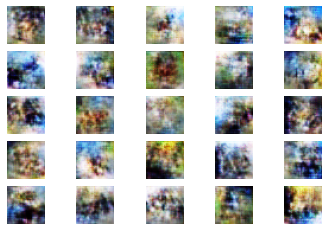

In [17]:
import numpy as np
X = (X*255).astype(np.uint8)

# plot the result
show_plot(X, 5)

#Note: CIFAR10 classes are: airplane, automobile, bird, cat, deer, dog, frog, horse,
# ship, truck

1/1 [==============================] - 0s 131ms/step


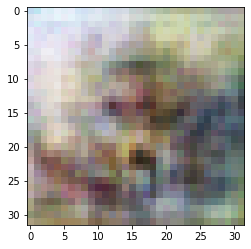

In [18]:
# example of generating an image for a specific point in the latent space
from keras.models import load_model
from numpy import asarray
from matplotlib import pyplot
# load model
model = load_model('generator_model_001.h5')
# all 0s
vector = asarray([[0.75 for _ in range(100)]])
# generate image
X = model.predict(vector)
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
pyplot.imshow(X[0, :, :])
pyplot.show()

# References

1. CSE 676 Deep Learning class slides

2. GAN 

[https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-a-cifar-10-small-object-photographs-from-scratch/]

[https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-a-cifar-10-small-object-photographs-from-scratch/]

3. CIFAR

[https://www.kaggle.com/code/vtu5118/cifar-10-using-vgg16]

[https://www.kaggle.com/code/vtu5118/cifar-10-using-vgg16]

[https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c]

[https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c]